#  Predicting BTC Price
###### Dereje(DJ) Demissie 

### Introduction 

**This notebook has two sections. The first section is about importing data and preprocessing of data. The second section presents different models and the associated data preprocessing.** 


# Part I : Data importing preprocessing 

### Importing Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import train_test_split
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.hypothesis_test_results import \
    CausalityTestResults, NormalityTestResults, WhitenessTestResults
from statsmodels.tsa.stattools import add_constant
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
% matplotlib inline

### Importing Data

In [3]:
btc_df=pd.read_csv("data/btc_df.csv", parse_dates=['Date'],index_col='Date')

In [4]:
gold_df=pd.read_csv('data/gold_df.csv',parse_dates=['Date'],index_col='Date')

In [5]:
currency_I_df=pd.read_csv('data/currecy_I_df.csv',parse_dates=['Date'],index_col='Date')

In [6]:
currency_II_df=pd.read_csv('data/currecy_II_df.csv',parse_dates=['Date'],index_col='Date')

In [7]:
vix_df=pd.read_csv('data/cobe_vix_df.csv',parse_dates=['Date'],index_col='Date')

In [8]:
sp500_df=pd.read_csv('data/SP500_df.csv',parse_dates=['Date'],index_col='Date')

### Data Preprocessing for Merging 

In [9]:
# btc_df.info()
btc_df.head()
# btc_df.describe()
# print(btc_df.isnull().sum()) # Features with high missing values will be dropped

,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NETDF,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,BCHAIN/NADDU,BCHAIN/NTRBL,...,BCHAIN/BCDDW,BCHAIN/BCDDM,BCHAIN/BCDDY,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/MIOPM,BCHAIN/DIFF
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,50.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000272,0.0,2.0,0.0,-2.147484e+09,1.0
2009-01-04,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.000000e+00,0.0
2009-01-05,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.000000e+00,0.0
2009-01-06,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.000000e+00,0.0
2009-01-07,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.000000e+00,0.0


In [10]:
# Following the observed missing values , I will drop variables with  higher number of NAs. 
columns_drop=['BCHAIN/NETDF',"BCHAIN/TVTVR","BCHAIN/BCDDC", "BCHAIN/BCDDE","BCHAIN/BCDDW", "BCHAIN/BCDDM","BCHAIN/BCDDY","BCHAIN/MIOPM"]
btc_df.drop(columns_drop, axis=1, inplace=True)
#btc_df.info()

In [11]:
btc_df=btc_df.asfreq("D")# Our data is  has included all the calander days.
btc_df.isnull().sum()
# Now, filling the missing values is the next step. I prefere to propagate a forward fill
btc_df.fillna(method='ffill', inplace=True)

#### SP&500

In [12]:
sp500_df.info()
#sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


In [13]:
# I prefer to use the closing price, since i am using the ffill, it is a better approximation 
sp500_close_df=sp500_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
sp500_close_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# resampling/changing frequency and filling na
sp500_close_df=sp500_close_df.asfreq('D', method = 'ffill')
#sp500_close_df.info()

#### Closing Price of Gold

In [15]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12759 entries, 1968-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    12758 non-null float64
dtypes: float64(1)
memory usage: 199.4 KB


In [16]:
gold_price_df=gold_df['2009-01-02':]
gold_price_df.isnull().sum()
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2009-01-02 to 2018-06-26
Data columns (total 1 columns):
gold_price    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


In [17]:
gold_price_df=gold_price_df.asfreq("D", method='ffill')
gold_price_df.isnull().sum()
gold_price_df.drop(gold_price_df.index[0], inplace=True)
#gold_price_df.info()

In [18]:
gold_price_df.head()

,gold_price
Date,
2009-01-03,869.75
2009-01-04,869.75
2009-01-05,860.00
2009-01-06,844.00
2009-01-07,864.00


#### Volatility Index

In [19]:
vix_df.info()
vix_close_df=vix_df.drop(['Open',"High","Low","Adj Close", "Volume"], axis=1)
vix_close_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2387 entries, 2009-01-02 to 2018-06-26
Data columns (total 6 columns):
Open         2387 non-null float64
High         2387 non-null float64
Low          2387 non-null float64
Close        2387 non-null float64
Adj Close    2387 non-null float64
Volume       2387 non-null int64
dtypes: float64(5), int64(1)
memory usage: 130.5 KB


Close    0
dtype: int64

In [20]:
vix_close_df=vix_close_df.asfreq('D', method='ffill')
vix_close_df.drop(vix_close_df.index[0], inplace= True)
vix_close_df.rename({'Close':'vix_closing_price'},axis=1, inplace=True)
vix_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
vix_closing_price    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [21]:
vix_close_df.head()

,vix_closing_price
Date,
2009-01-03,39.189999
2009-01-04,39.189999
2009-01-05,39.080002
2009-01-06,38.560001
2009-01-07,43.389999


#### Currency (EUR/USD, USD/JPY)

In [22]:
currency_I_df.columns

Index(['EUR/USD Close', 'EUR/USD High', 'EUR/USD Low', 'USD/JPY Close',
       'USD/JPY High', 'USD/JPY Low'],
      dtype='object')

In [23]:
currency_I_df.drop(['EUR/USD High', 'EUR/USD Low', 
       'USD/JPY High', 'USD/JPY Low'],axis=1, inplace=True)

In [24]:
currency_I_close_df=currency_I_df.asfreq('D', method='ffill')
currency_I_close_df.drop(currency_I_close_df.index[0:2],inplace=True)
currency_I_close_df.head()

,EUR/USD Close,USD/JPY Close
Date,,
2009-01-03,1.3855,92.21
2009-01-04,1.3855,92.21
2009-01-05,1.3600,93.20
2009-01-06,1.3527,93.96
2009-01-07,1.3628,92.68


#### Currencey( CNY/USD)

In [25]:
currency_II_df.head(5)

,Open,High,Low,Close
Date,,,,
2009-01-01,6.8280,6.8280,6.8280,6.8280
2009-01-02,6.8245,6.8245,6.8245,6.8245
2009-01-05,6.8372,6.8372,6.8372,6.8372
2009-01-06,6.8375,6.8375,6.8375,6.8375
2009-01-07,6.8364,6.8364,6.8364,6.8364


In [26]:
currency_II_df.columns

Index([' Open', ' High', ' Low', ' Close'], dtype='object')

In [27]:
currency_II_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2009-01-01 to 2018-06-26
Data columns (total 4 columns):
 Open     2474 non-null float64
 High     2474 non-null float64
 Low      2474 non-null float64
 Close    2474 non-null float64
dtypes: float64(4)
memory usage: 96.6 KB


In [28]:
currency_II_df=currency_II_df.asfreq('D', method='ffill')

In [29]:
currency_II_close_df=currency_II_df.drop([' Open', ' High', ' Low'], axis=1)

In [30]:
currency_II_close_df.drop(currency_II_close_df.index[0:2], inplace=True)

In [31]:
currency_II_close_df.rename({' Close':'USD/CNY Close'},axis=1, inplace=True)

In [32]:
currency_II_close_df.head()

,USD/CNY Close
Date,
2009-01-03,6.8245
2009-01-04,6.8245
2009-01-05,6.8372
2009-01-06,6.8375
2009-01-07,6.8364


In [33]:
currency_II_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3462 entries, 2009-01-03 to 2018-06-26
Freq: D
Data columns (total 1 columns):
USD/CNY Close    3462 non-null float64
dtypes: float64(1)
memory usage: 54.1 KB


In [34]:
#currency_II_df.isnull().sum()

## Merging All together

In [35]:
df=[currency_II_close_df, currency_I_close_df, btc_df, gold_price_df, sp500_close_df, vix_close_df]

In [36]:
final_df = pd.concat(df, axis=1)
#final_df.info()

In [37]:
# Droping Missing Values 
final_df.dropna(inplace=True)

In [38]:
final_df.describe()

,USD/CNY Close,EUR/USD Close,USD/JPY Close,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,...,BCHAIN/ATRCT,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/DIFF,gold_price,Close,vix_closing_price
count,3461.000000,3461.000000,3461.000000,3.461000e+03,3.461000e+03,3461.000000,3.461000e+03,3461.000000,3.461000e+03,3461.000000,...,3461.000000,3461.000000,3461.000000,3.461000e+03,3.461000e+03,3461.000000,3.461000e+03,3461.000000,3461.000000,3461.000000
mean,6.478986,1.264053,99.005089,1.045541e+07,1.726988e+10,52.658522,2.434459e+05,93787.699220,7.050811e+07,86925.164403,...,6.725301,36136.870251,0.324577,9.594308e+04,4.294568e+06,25036.730714,2.937172e+11,1309.613219,1711.789778,18.487073
std,0.264516,0.118786,14.067077,5.310150e+06,4.451576e+10,109.782651,1.267187e+06,102887.265942,9.366149e+07,102085.404283,...,5.220901,49408.406602,0.359394,2.524165e+05,6.684005e+06,29252.078997,8.141247e+11,214.191150,527.443948,7.691563
min,6.041000,1.038720,75.720000,5.000000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,813.000000,676.530029,9.140000
25%,6.232900,1.140090,85.760000,6.256250e+06,2.136330e+07,3.428995,9.189767e+00,4796.000000,5.266640e+05,3779.000000,...,0.000000,44.000000,0.009662,0.000000e+00,2.000000e+00,0.000000,2.441125e+05,1189.100000,1259.780029,13.280000
50%,6.429100,1.292000,100.119000,1.177365e+07,1.525042e+09,16.509725,3.781426e+03,56685.000000,2.465934e+07,36560.000000,...,7.633333,10195.000000,0.159857,3.197619e+04,4.523020e+05,9595.000000,1.488192e+08,1279.000000,1701.839966,16.200001
75%,6.773200,1.358500,110.860000,1.519852e+07,8.112594e+09,44.519552,1.814480e+04,181832.000000,1.094779e+08,176307.000000,...,9.833333,58188.000000,0.657941,1.364805e+05,6.018211e+06,47878.000000,1.441164e+11,1386.000000,2093.320068,21.309999
max,6.960700,1.513600,125.637000,1.711562e+07,3.265254e+11,1495.946477,2.272484e+07,490644.000000,3.244345e+08,470650.000000,...,47.733333,172522.335593,1.110327,8.484600e+06,2.556751e+07,122796.000000,5.077499e+12,1896.500000,2872.870117,56.650002


# Part II: Model Building 

## ARIMA Model Building 

In [39]:
btc_price=final_df['BCHAIN/MKPRU']

In [40]:
btc_price.describe()

count     3461.000000
mean      1056.638364
std       2638.915393
min          0.000000
25%          2.930000
50%        135.601000
75%        596.080000
max      19498.683333
Name: BCHAIN/MKPRU, dtype: float64

In [41]:
#Remove rows of zero prices from a Pandas series
btc_price=btc_price[btc_price!=0]

In [42]:
btc_price_df=pd.DataFrame(btc_price)

In [43]:
btc_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2010-08-17 to 2018-06-26
Freq: D
Data columns (total 1 columns):
BCHAIN/MKPRU    2871 non-null float64
dtypes: float64(1)
memory usage: 44.9 KB


In [44]:
#btc_price_df.head() 
btc_price_df.tail()

,BCHAIN/MKPRU
Date,
2018-06-22,6733.901667
2018-06-23,6332.573333
2018-06-24,6141.605833
2018-06-25,6037.008333
2018-06-26,6211.447500


In [45]:
btc_price_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BCHAIN/MKPRU,2871.0,1273.781044,2849.347949,0.0609,11.836,277.43,659.775,19498.683333


Text(0,0.5,'Price USD')

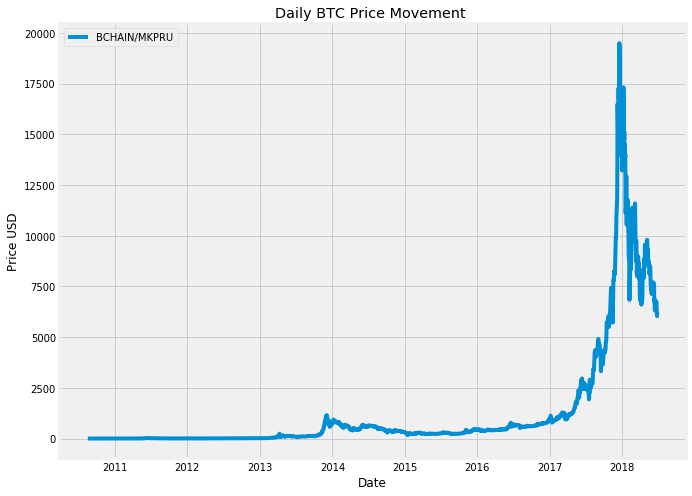

In [46]:
# A plotting the price movement 
fig, ax=plt.subplots(figsize=(10,8))
btc_price_df.plot(ax=ax, title="Daily BTC Price Movement ")
plt.ylabel('Price USD')

* *The above plot shows no clear pattern of price movement rather it is cyclical. It is also important to understand the movement by decomposing it in  to  error, trend and seasonality. It will help us to understand the behaviour of the price movement.*   

#### Visualization of ETS decomposition 


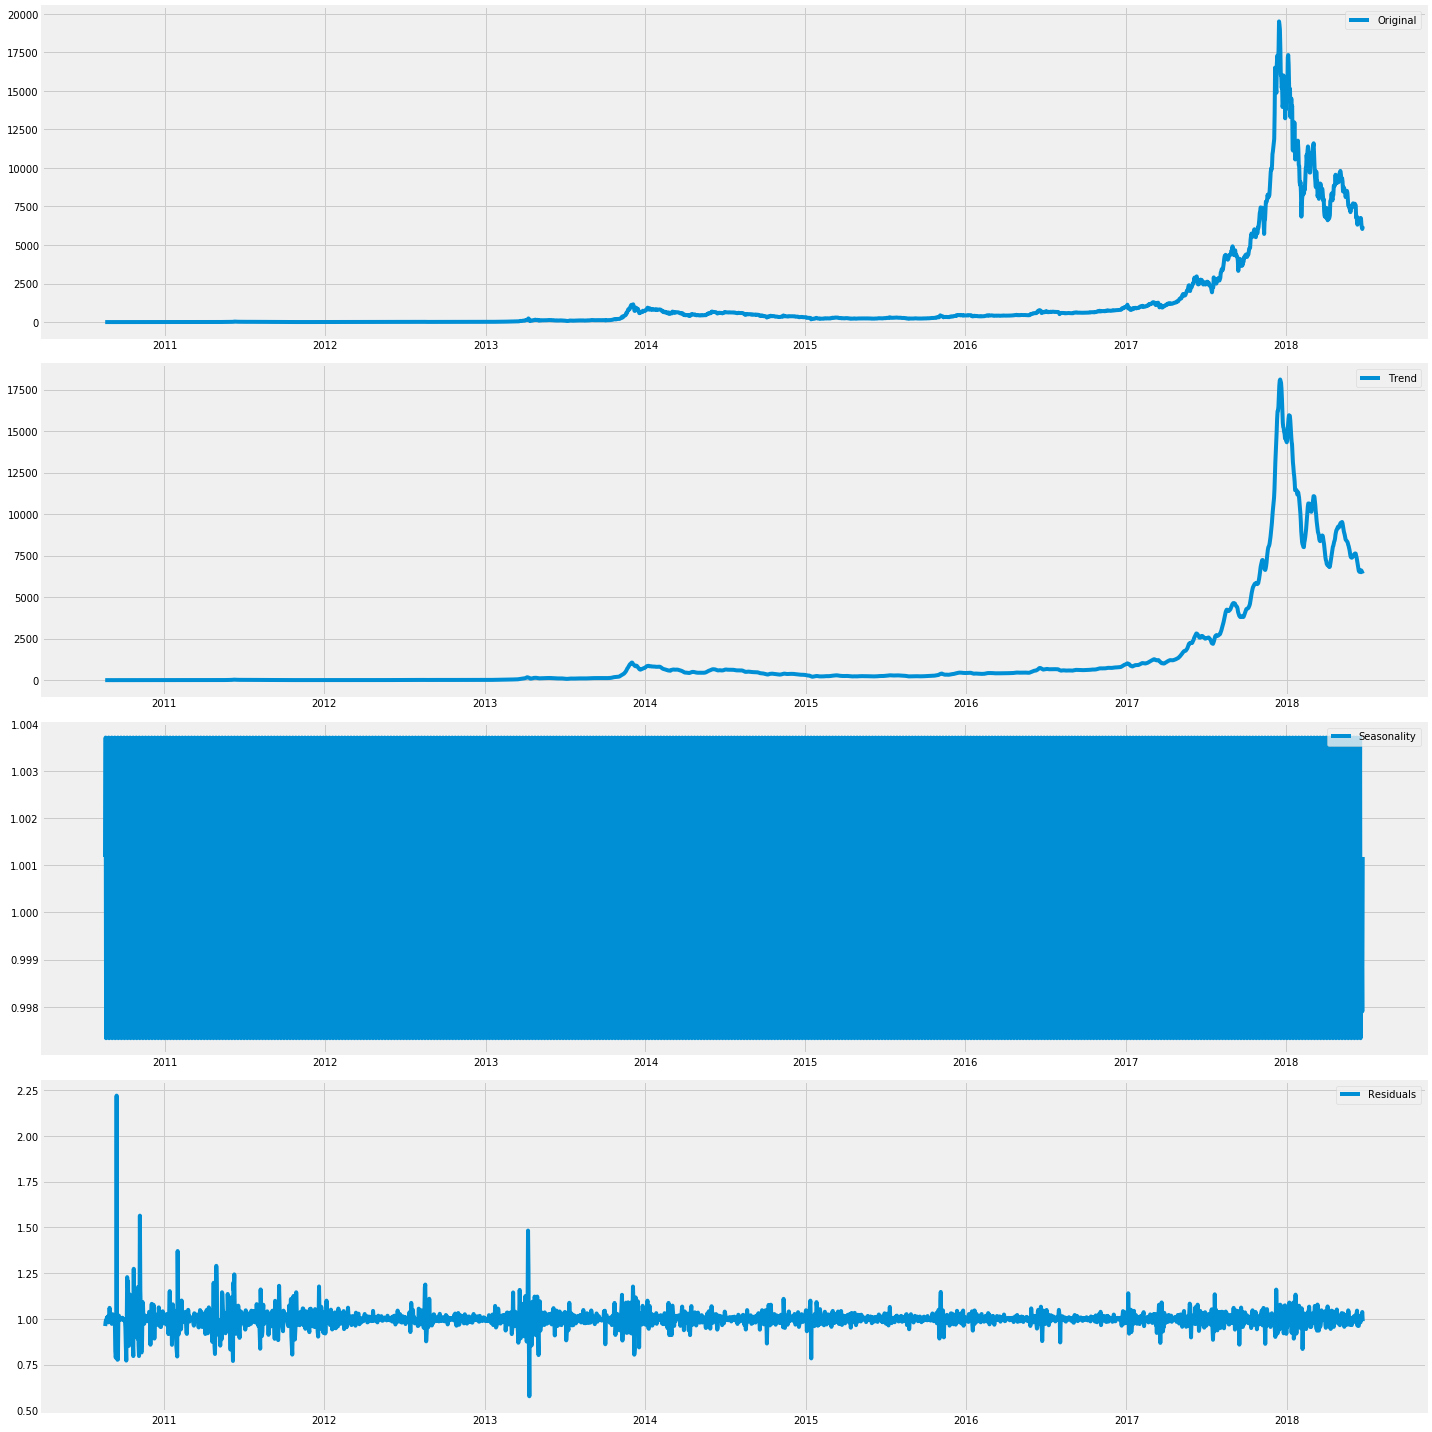

In [47]:
# Visualization of ETS decomposition 
decomposition = seasonal_decompose(btc_price_df["BCHAIN/MKPRU"], model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax=plt.subplots(figsize=(20,20))
plt.subplot(411)
plt.plot(btc_price_df["BCHAIN/MKPRU"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* *The decomposed trend shows us a multiplicative model over the time.* 

### Testing for stationarity

* **Stationarity of a time sereis is a situation where the sereis exhibits a constant mean and variance overtime. Visual inspection and  Augmented Dickey-Fuller unit root test can help us to test stationarity. The Null hypothesis in ADF test is the series is non stationary or has a nuit root.** 

In [48]:
#Let's write a function to call for a plot and Adf test

In [49]:
def adf_test(df):
    #plot the series for visual inspection
    fig, ax=plt.subplots(figsize=(15,10))
    plt.plot(df,color='green')
    plt.title('Daily Price of Bitcoin')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    if dfoutput[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")

    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

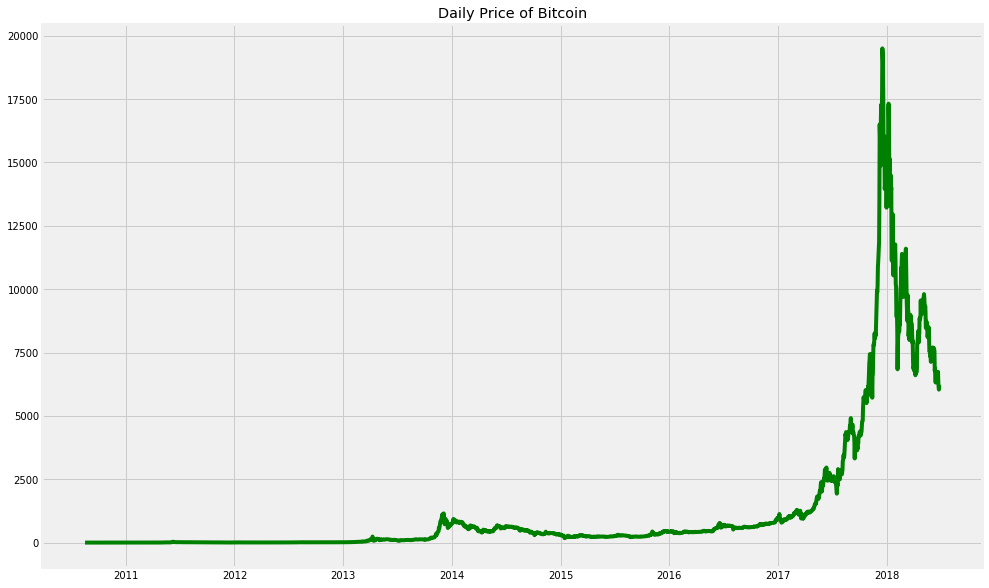

Results of Dickey-Fuller Test:
Test Statistic                   -1.863792
p-value                           0.349282
#Lags Used                       27.000000
Number of Observations Used    2843.000000
Critical Value (1%)              -3.432652
Critical Value (5%)              -2.862557
Critical Value (10%)             -2.567311
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [50]:
adf_test(btc_price_df['BCHAIN/MKPRU'])

* **When a series is non stationary , the series should be transformed  until it becomes statioanry. Log transformation and differences of the series are the most common approaches of transformation.Here we will employ both of them to transform our series in to a stationary series.** 

### Log transformation of the series 

In [51]:
btc_price_df["log_price"]=np.log(btc_price_df['BCHAIN/MKPRU'])

In [52]:
btc_price_df["log_price"].describe()

count    2871.000000
mean        4.788544
std         2.876800
min        -2.798522
25%         2.471146
50%         5.625569
75%         6.491899
max         9.878102
Name: log_price, dtype: float64

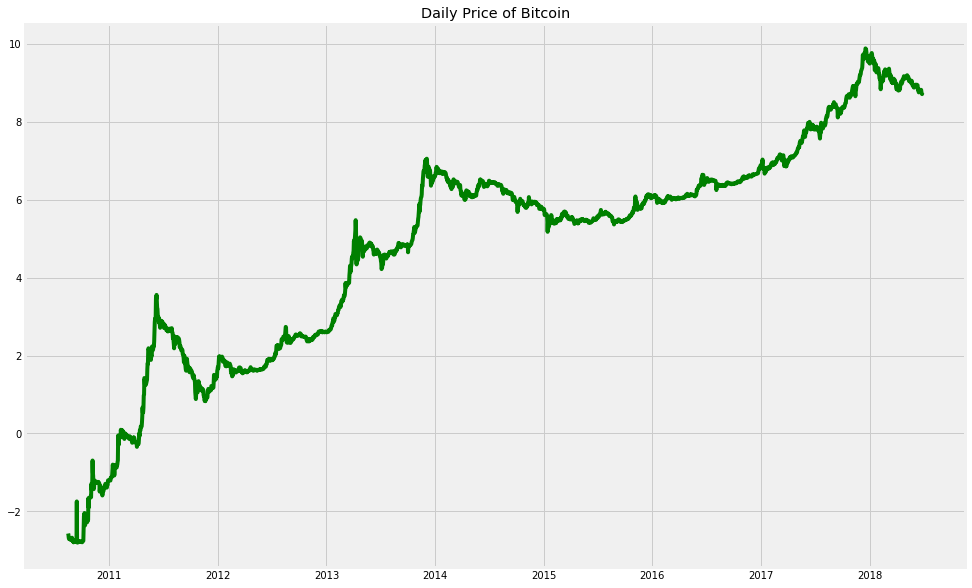

Results of Dickey-Fuller Test:
Test Statistic                   -2.570922
p-value                           0.099157
#Lags Used                       16.000000
Number of Observations Used    2854.000000
Critical Value (1%)              -3.432643
Critical Value (5%)              -2.862553
Critical Value (10%)             -2.567309
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
adf_test(btc_price_df["log_price"]) 

### First Difference

* *The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas .dff().*

In [54]:
btc_price_df["price_diff"]=btc_price_df["BCHAIN/MKPRU"].diff()

In [55]:
btc_price_df["price_diff"].dropna(axis=0, inplace=True)

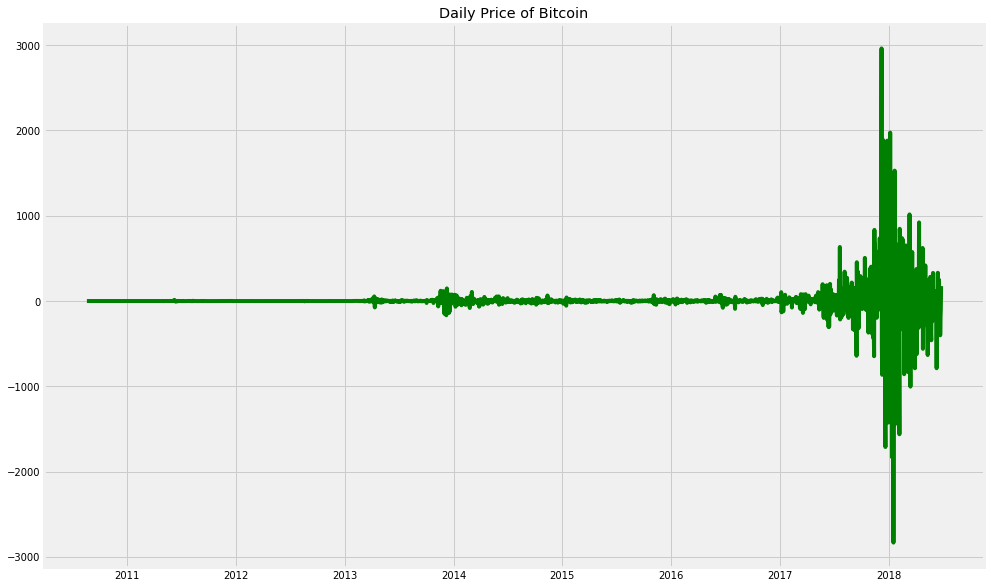

Results of Dickey-Fuller Test:
Test Statistic                -9.813783e+00
p-value                        5.566880e-17
#Lags Used                     2.800000e+01
Number of Observations Used    2.841000e+03
Critical Value (1%)           -3.432654e+00
Critical Value (5%)           -2.862558e+00
Critical Value (10%)          -2.567312e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [56]:
adf_test(btc_price_df["price_diff"])

### First Difference on log transformed 

* *Since the data has some outliers, applying the first difference on the log transformed series would help to reduce the variablity of the data* 

In [57]:
btc_price_df["log_price_diff"]=btc_price_df["log_price"].diff()

In [58]:
btc_price_df["log_price_diff"].dropna(axis=0, inplace=True)

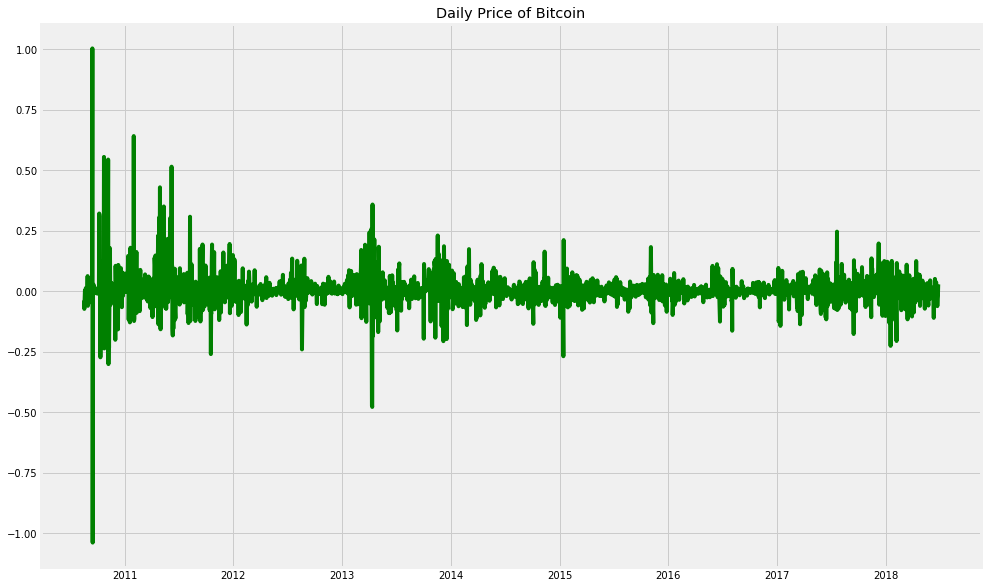

Results of Dickey-Fuller Test:
Test Statistic                -1.087471e+01
p-value                        1.340772e-19
#Lags Used                     1.500000e+01
Number of Observations Used    2.854000e+03
Critical Value (1%)           -3.432643e+00
Critical Value (5%)           -2.862553e+00
Critical Value (10%)          -2.567309e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [59]:
adf_test(btc_price_df["log_price_diff"])

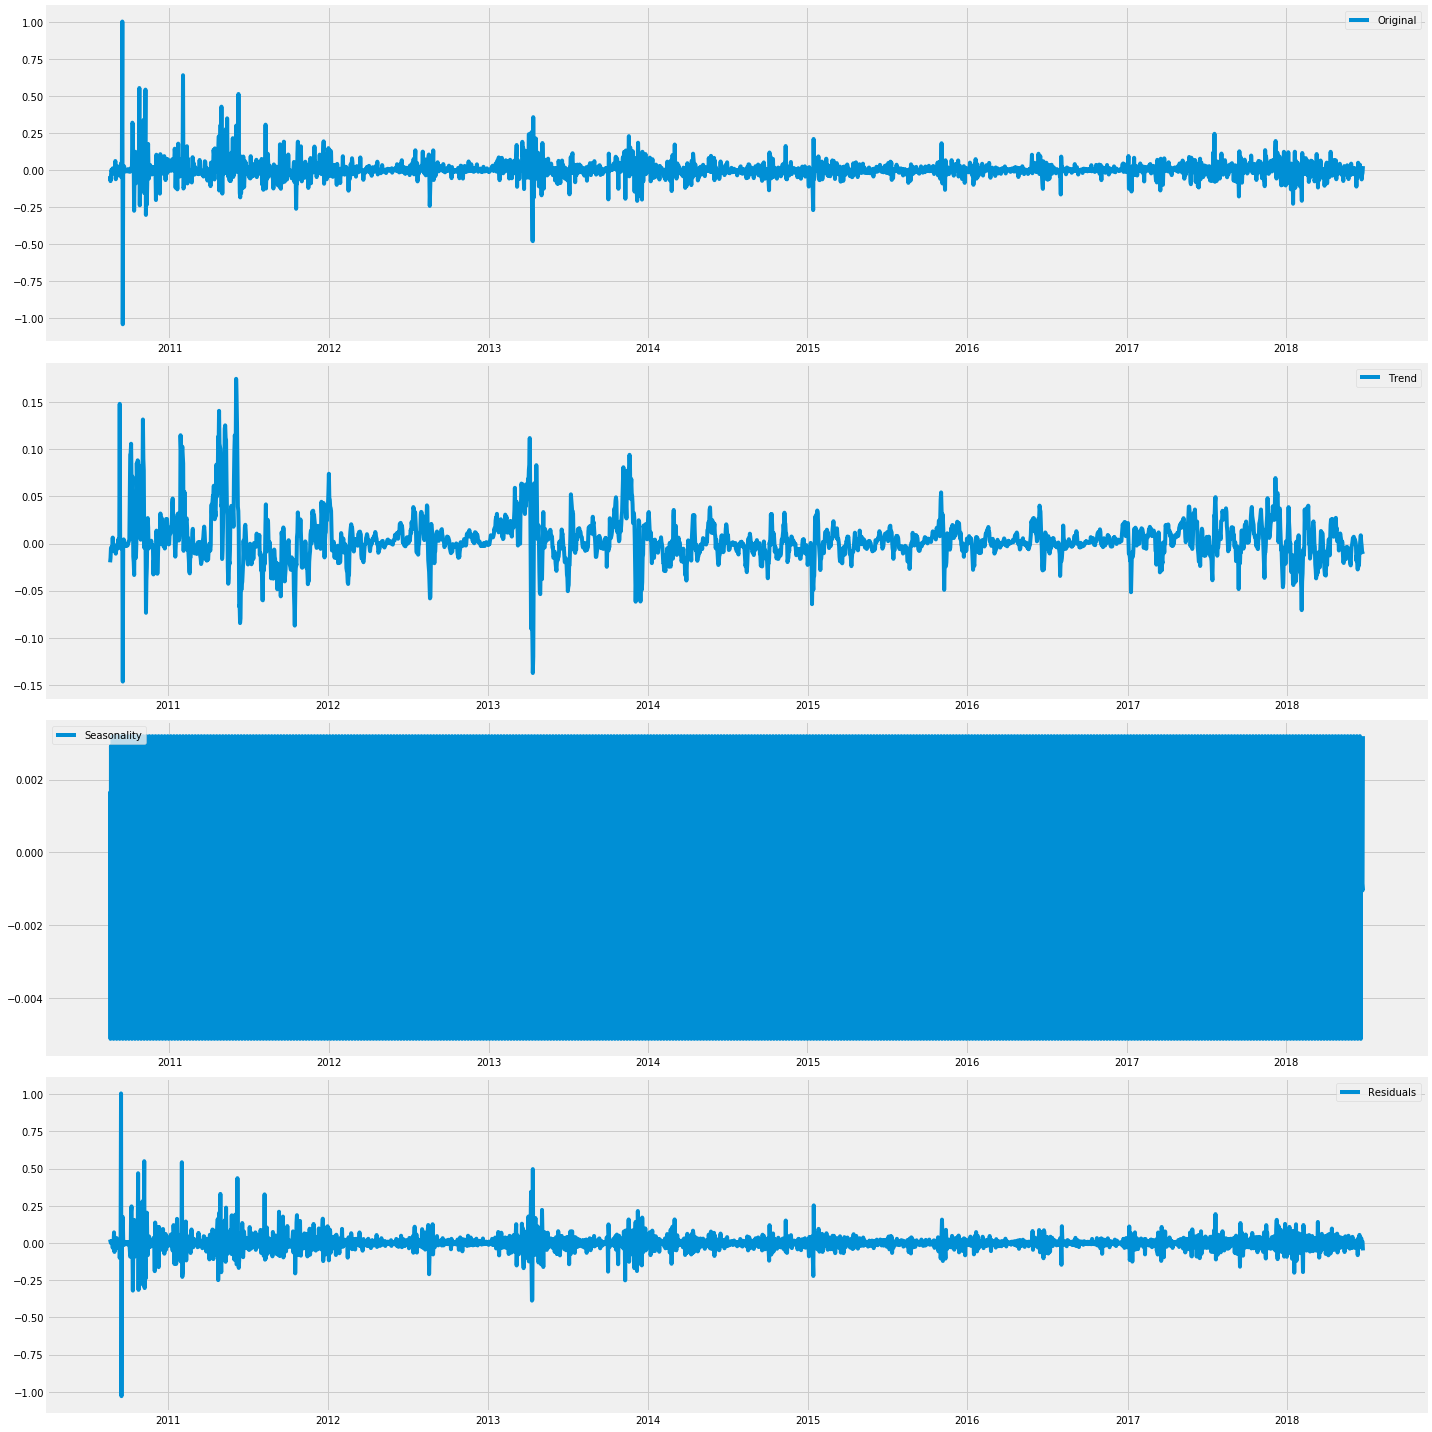

In [60]:
decomposition = seasonal_decompose(btc_price_df["log_price_diff"], model='Multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax=plt.subplots(figsize=(20,20))
plt.subplot(411)
plt.plot(btc_price_df["log_price_diff"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Compared to the First difference and log difference , the visual inspection is clearly showing to us  the log transformed first difference model is a better stationary model at first difference. It helps us to reduced the non stationarity structures from our model. Thus, we will use the log transformed series for  model bulding.**

In [61]:
#we can check the mean and variance ,if they are smoothed 
X = btc_price_df["log_price_diff"].values
split = int(len(X) / 2)
X1=X[0:split]
X2=X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.006269, mean2=0.001605
variance1=0.006556, variance2=0.001552


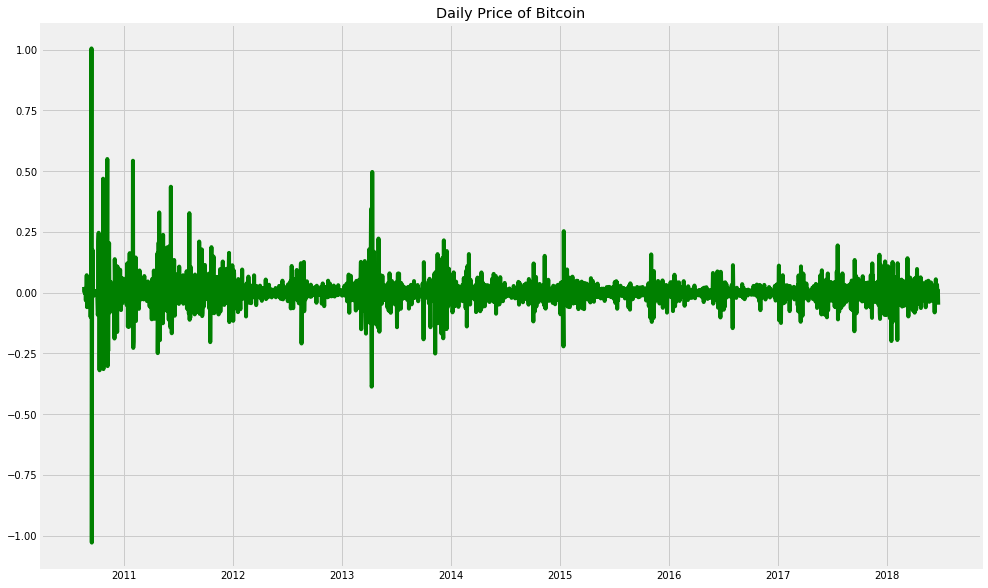

Results of Dickey-Fuller Test:
Test Statistic                  -22.140295
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    2835.000000
Critical Value (1%)              -3.432659
Critical Value (5%)              -2.862560
Critical Value (10%)             -2.567313
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [62]:
#Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:
decom_resid = residual
decom_resid.dropna(inplace=True)
adf_test(decom_resid)

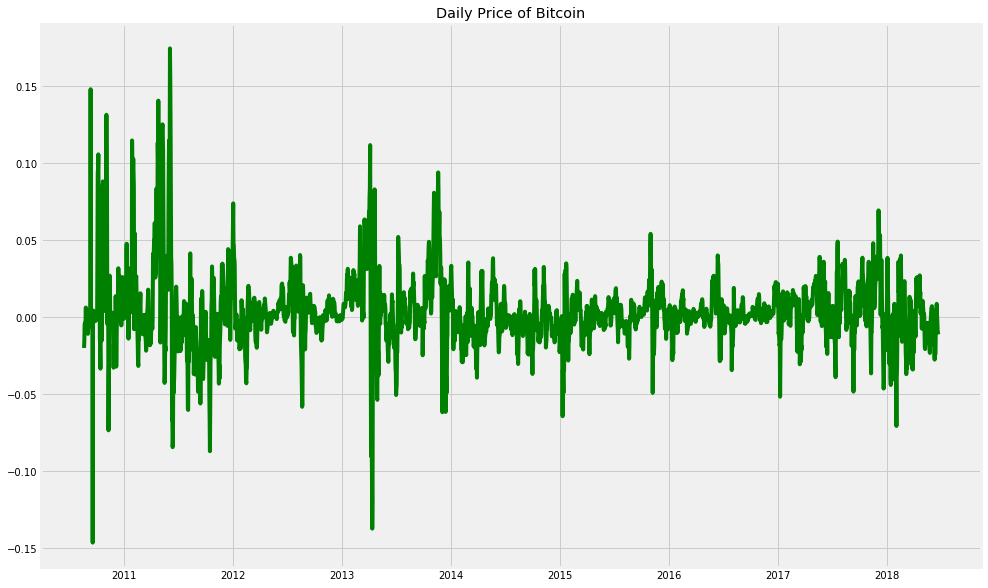

Results of Dickey-Fuller Test:
Test Statistic                -6.849026e+00
p-value                        1.713140e-09
#Lags Used                     2.800000e+01
Number of Observations Used    2.835000e+03
Critical Value (1%)           -3.432659e+00
Critical Value (5%)           -2.862560e+00
Critical Value (10%)          -2.567313e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [63]:
decom_trend = trend
decom_trend.dropna(inplace=True)
adf_test(decom_trend)
# There was a trend stationarity and eliminated after the first difference

**We have learned that model is stationary after difference on the level. Once stationarity is obtained, the next step is to determine the order of ARIMA model. AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, we can identify the numbers of AR and/or MA terms that are needed.**

### Checking for Serial Correlation: Ljung Box test

**Once we have a stationary time series we will check for serial correlation. We will use Ljung Box test . The Ljung–Box test may be defined as:**

*H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).*

*Ha: The data are not independently distributed; they exhibit serial correlation.A small  p value shows significant autocorrelation.  If there is a serial correlation we will employ PCAF and ACF.*
    

In [64]:
Ljung_Box=acorr_ljungbox(btc_price_df["log_price_diff"], lags=10, boxpierce=False)
data = list(Ljung_Box)
data=pd.DataFrame(data)
data=(data.T)
data.columns=['Test Statistic', 'p-value']
data 

,Test Statistic,p-value
0,6.357870,0.011686
1,7.166115,0.027791
2,7.991840,0.046181
3,9.111749,0.058366
4,12.347839,0.030320
5,28.443548,0.000078
6,29.061436,0.000141
7,33.403672,0.000052
8,33.418007,0.000113
9,39.776243,0.000019


**At the α=0.05 significance level, the null hypothesis of no autocorrelation is rejected at all  lags.The conclusion is that there is significant autocorrelation in the series.**

### Eliminating Serial Correlation(Determining ARIMA order)

In [65]:
btc_acf=acf(btc_price_df["log_price_diff"], nlags=40)
btc_pacf=pacf(btc_price_df["log_price_diff"], nlags=40)

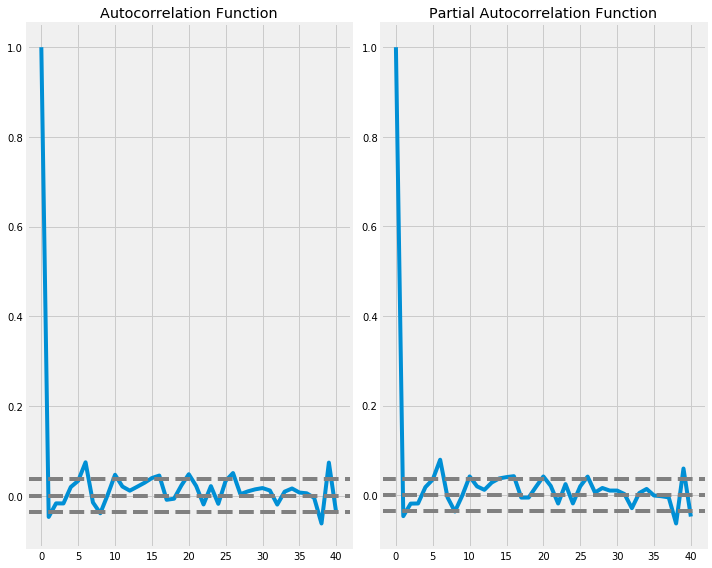

In [66]:
#Plot ACF: 
fig, ax=plt.subplots(figsize=(10,8))
plt.subplot(121) 
plt.plot(btc_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btc_price_df["log_price_diff"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(btc_price_df["log_price_diff"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: 
plt.subplot(122)
plt.plot(btc_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btc_price_df["log_price_diff"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(btc_price_df["log_price_diff"])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* **The above correlation plots shown us an order of 6,6. So, here we will have three models . The first one will be AR(6), the second one is MA(6) and a combined model of ARIMA(6,1,6)**

In [67]:
btc_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2010-08-17 to 2018-06-26
Freq: D
Data columns (total 4 columns):
BCHAIN/MKPRU      2871 non-null float64
log_price         2871 non-null float64
price_diff        2870 non-null float64
log_price_diff    2870 non-null float64
dtypes: float64(4)
memory usage: 112.1 KB


In [68]:
from datetime import date

d0 = date(2018, 6, 19)
d1 = date(2018, 6, 26)
delta = d1 - d0
print (delta.days)

7


### ARIMA modeling on Training data set

In [69]:
train =btc_price_df.loc['2010-08-17':'2018-06-19']
test = btc_price_df.loc['2018-06-20':]
len(train) #Try by reducing the test data size

2864

In [70]:
train.dropna(inplace=True)
test.dropna(inplace=True)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Estimation on the AR(6) Model

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2018-06-20 to 2018-06-26
Freq: D
Data columns (total 4 columns):
BCHAIN/MKPRU      7 non-null float64
log_price         7 non-null float64
price_diff        7 non-null float64
log_price_diff    7 non-null float64
dtypes: float64(4)
memory usage: 280.0 bytes


In [72]:
#fig, ax=plt.subplots(figsize=(15,15))
model=ARIMA(train["log_price"], order=(6,1,0))
results_AR= model.fit(disp=-1)
#plt.plot(train["log_price_diff"])
#plt.plot(results_ARIMA.fittedvalues, color='red', label="fitted_value")
rs=results_AR.fittedvalues-train["log_price_diff"]
rs.dropna(inplace=True)
rss=sum((rs)**2)
#plt.title(('RSS: %.4f'% rss))
print(rss)

11.516617161660342


In [73]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_price   No. Observations:                 2862
Model:                 ARIMA(6, 1, 0)   Log Likelihood                3831.642
Method:                       css-mle   S.D. of innovations              0.063
Date:                Mon, 23 Jul 2018   AIC                          -7647.285
Time:                        15:00:27   BIC                          -7599.610
Sample:                    08-19-2010   HQIC                         -7630.095
                         - 06-19-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0040      0.001      3.192      0.001       0.002       0.006
ar.L1.D.log_price    -0.0519      0.019     -2.786      0.005      -0.088      -0.015
ar.L2.D.log_price    -0.

Text(0.5,1,'RSS: 11.5166')

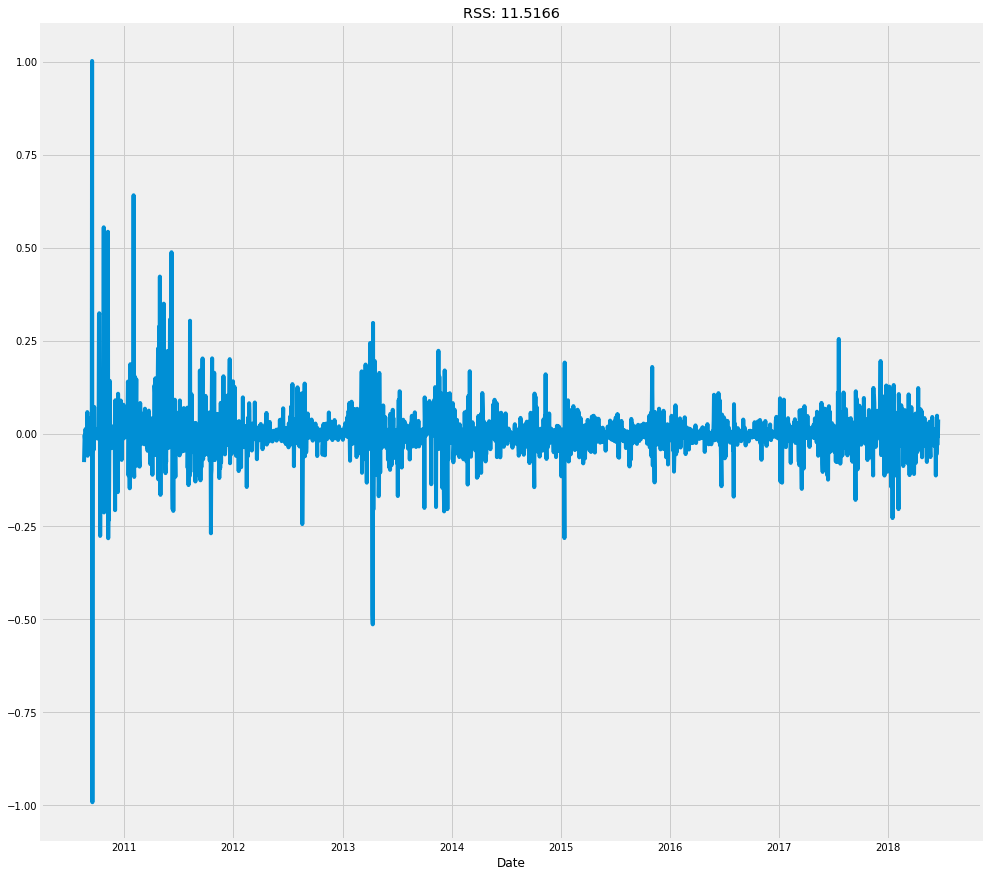

In [74]:
fig, ax=plt.subplots(figsize=(15,15))
results_AR.resid.plot()
plt.title(('RSS: %.4f'% rss))

Text(0.5,1,'Density plot of the residual error values')

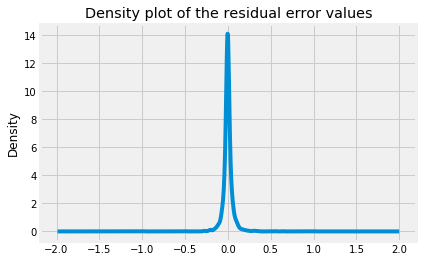

In [75]:
results_AR.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')

In [76]:
def rebuild_diffed(series, first_element_original):
    cumsum = series.cumsum()
    return np.exp(cumsum.fillna(0) + first_element_original)

In [77]:
fitted_AR=pd.Series(results_AR.fittedvalues, copy=True)

In [78]:
predicted_AR=rebuild_diffed(fitted_AR, train["log_price"].iloc[0])

In [79]:
predicted_AR.tail()

Date
2018-06-15    6680.511840
2018-06-16    6667.883801
2018-06-17    6639.628954
2018-06-18    6649.648956
2018-06-19    6650.704451
Freq: D, dtype: float64

Text(0.5,1,'RMSE: 1918.2793')

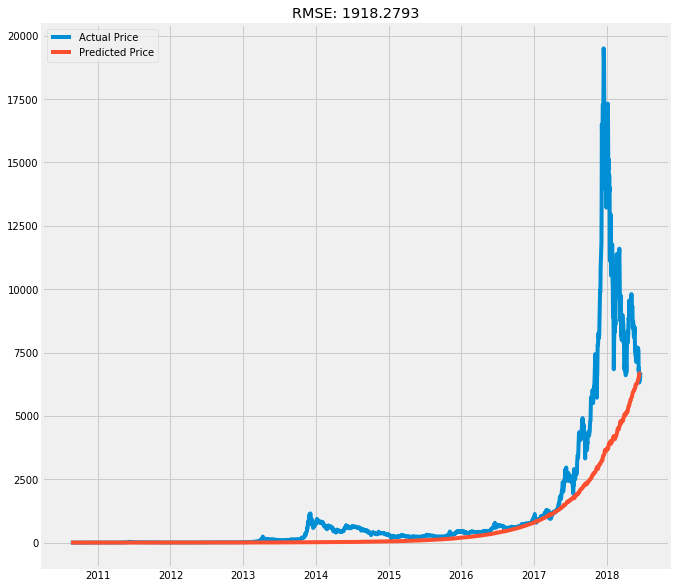

In [229]:
fig, ax=plt.subplots(figsize=(10,10))

plt.plot(train['BCHAIN/MKPRU'], label='Actual Price')
plt.plot(predicted_AR, label='Predicted Price')
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_AR-train['BCHAIN/MKPRU']).fillna(0)**2)/len(train['BCHAIN/MKPRU'])))

### Estimation MA(6)

In [81]:
#fig, ax=plt.subplots(figsize=(15,15))
model=ARIMA(train["log_price"], order=(0,1,6))
results_MA= model.fit(disp=-1)
#plt.plot(train["log_price_diff"])
#plt.plot(results_ARIMA.fittedvalues, color='red', label="fitted_value")
rs=results_MA.fittedvalues-train["log_price_diff"]
rs.dropna(inplace=True)
rss=sum((rs)**2)
#plt.title(('RSS: %.4f'% rss))
print(rss)

11.53006759592194


In [82]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_price   No. Observations:                 2862
Model:                 ARIMA(0, 1, 6)   Log Likelihood                3829.975
Method:                       css-mle   S.D. of innovations              0.063
Date:                Mon, 23 Jul 2018   AIC                          -7643.950
Time:                        15:00:28   BIC                          -7596.276
Sample:                    08-19-2010   HQIC                         -7626.761
                         - 06-19-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0040      0.001      3.215      0.001       0.002       0.006
ma.L1.D.log_price    -0.0490      0.019     -2.633      0.009      -0.086      -0.013
ma.L2.D.log_price    -0.

Text(0.5,1,'Density plot of the residual error values')

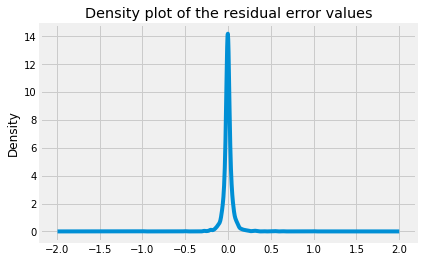

In [83]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')

Text(0.5,1,'RMSE: 1922.5417')

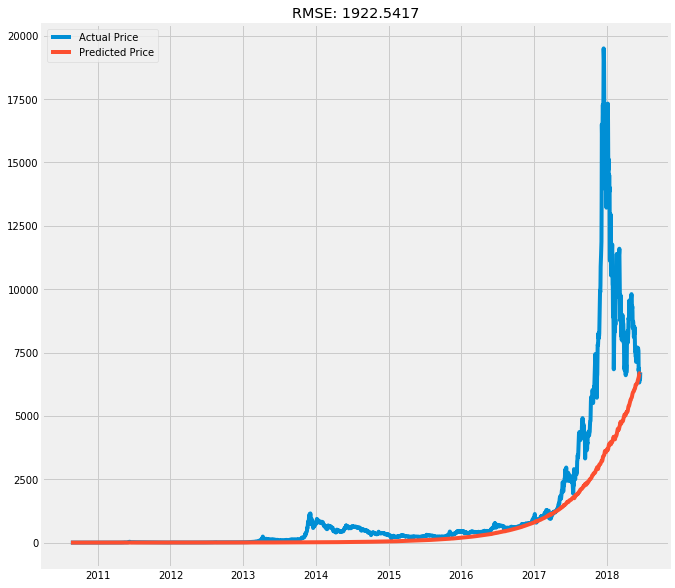

In [232]:
fitted_MA=pd.Series(results_MA.fittedvalues, copy=True)
predicted_MA=rebuild_diffed(fitted_MA, train["log_price"].iloc[0])

fig, ax=plt.subplots(figsize=(10,10))

plt.plot(train['BCHAIN/MKPRU'], label= "Actual Price")
plt.plot(predicted_MA, label='Predicted Price')
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_MA-train['BCHAIN/MKPRU']).fillna(0)**2)/len(train['BCHAIN/MKPRU'])))

In [87]:
predicted_MA.tail()

Date
2018-06-15    6681.414607
2018-06-16    6671.925335
2018-06-17    6651.044461
2018-06-18    6656.985203
2018-06-19    6659.354202
Freq: D, dtype: float64

In [88]:
#fig, ax=plt.subplots(figsize=(15,15))
model=ARIMA(train["log_price"], order=(6,1,6))
results_ARIMA= model.fit(disp=-1)
#plt.plot(train["log_price_diff"])
#plt.plot(results_ARIMA.fittedvalues, color='red', label="fitted_value")
rs=results_ARIMA.fittedvalues-train["log_price_diff"]
rs.dropna(inplace=True)
rss=sum((rs)**2)
#plt.title(('RSS: %.4f'% rss))
print(rss)

11.423808142546935


In [89]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_price   No. Observations:                 2862
Model:                 ARIMA(6, 1, 6)   Log Likelihood                3843.319
Method:                       css-mle   S.D. of innovations              0.063
Date:                Mon, 23 Jul 2018   AIC                          -7658.638
Time:                        15:07:07   BIC                          -7575.208
Sample:                    08-19-2010   HQIC                         -7628.556
                         - 06-19-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0039      0.002      2.286      0.022       0.001       0.007
ar.L1.D.log_price     0.2703      0.274      0.986      0.324      -0.267       0.807
ar.L2.D.log_price    -0.

Text(0.5,1,'Density plot of the residual error values')

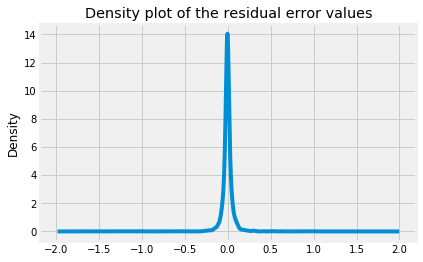

In [90]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')

Text(0.5,1,'RMSE: 1782.7938')

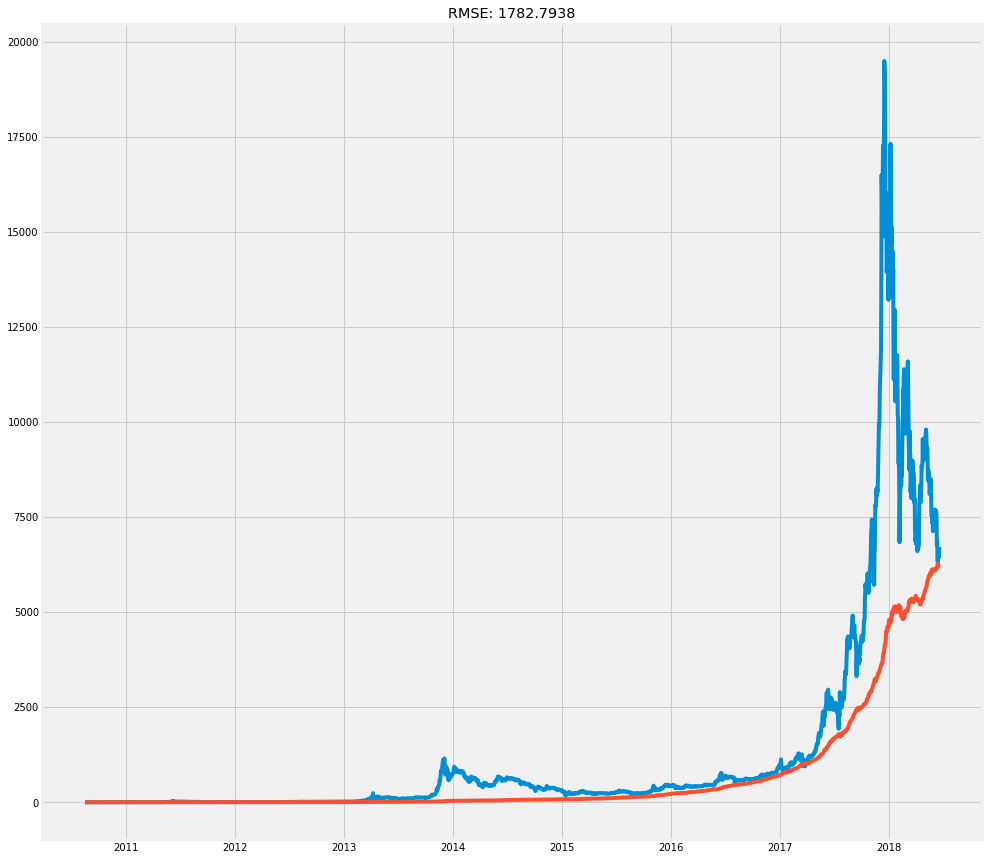

In [91]:
fitted_ARIMA=pd.Series(results_ARIMA.fittedvalues, copy=True)
predicted_ARIMA=rebuild_diffed(fitted_ARIMA,train['log_price'].iloc[0])
fig, ax=plt.subplots(figsize=(15,15))

plt.plot(train['BCHAIN/MKPRU'])
plt.plot(predicted_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_ARIMA-train['BCHAIN/MKPRU']).fillna(0)**2)/len(train['BCHAIN/MKPRU'])))

### ARIMA Model on Full data set 

Text(0.5,1,'RSS: 11.4229')

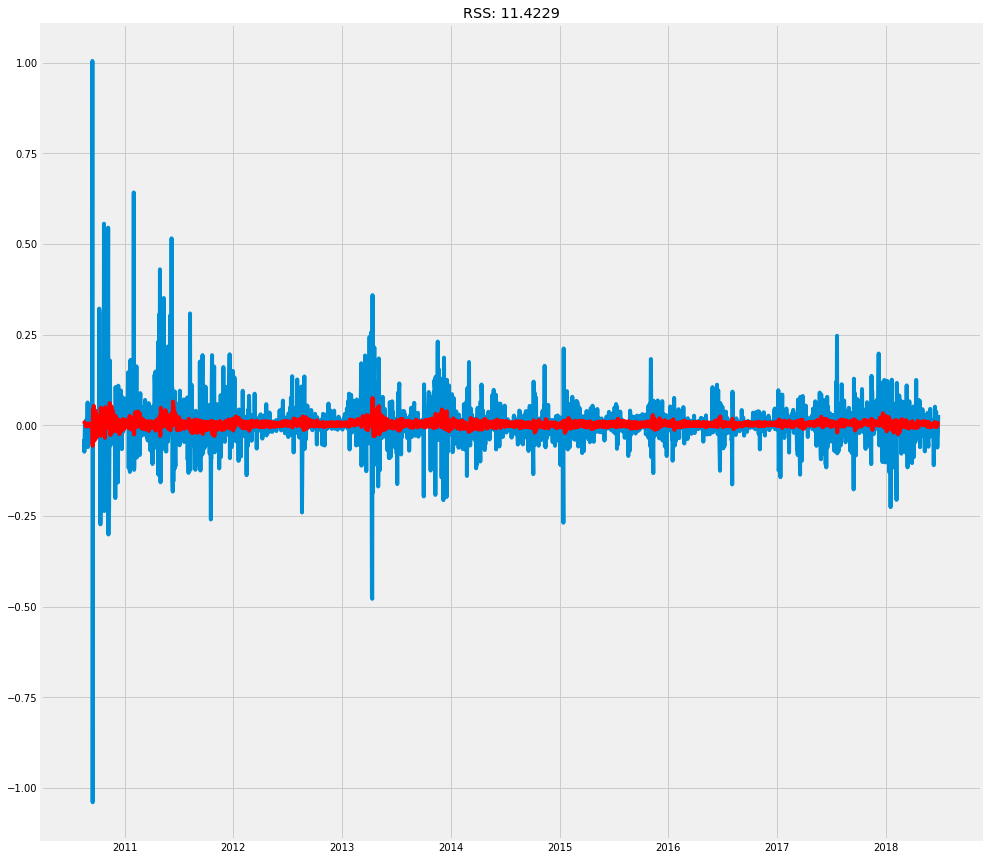

In [92]:
fig, ax=plt.subplots(figsize=(15,15))
full_model=ARIMA(btc_price_df["log_price"], order=(6,1,6))
full_results_ARIMA= full_model.fit(disp=-1)
plt.plot(btc_price_df["log_price_diff"])
plt.plot(full_results_ARIMA.fittedvalues, color='red')
full_rss=full_results_ARIMA.fittedvalues - btc_price_df["log_price_diff"]
full_rss.dropna(inplace=True)
plt.title(('RSS: %.4f'% sum((full_rss)**2)))
#plt.legend(loc = 'best')

In [93]:
print(full_results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_price   No. Observations:                 2870
Model:                 ARIMA(6, 1, 6)   Log Likelihood                3860.122
Method:                       css-mle   S.D. of innovations              0.063
Date:                Mon, 23 Jul 2018   AIC                          -7692.244
Time:                        15:08:10   BIC                          -7608.775
Sample:                    08-18-2010   HQIC                         -7662.153
                         - 06-26-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0039      0.002      2.252      0.024       0.000       0.007
ar.L1.D.log_price     0.1579      0.176      0.896      0.370      -0.187       0.503
ar.L2.D.log_price    -0.

Text(0.5,1,'Density plot of the residual error values')

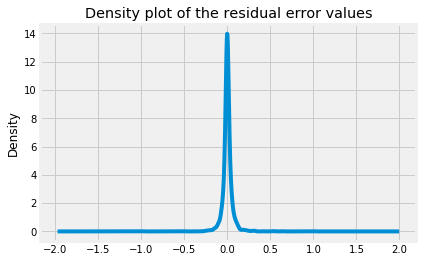

In [94]:
full_results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')

Text(0.5,1,'RMSE: 1884.3153')

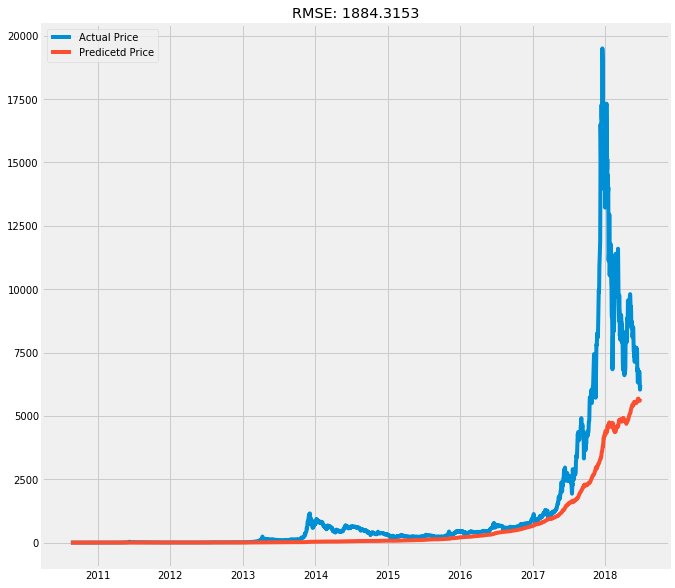

In [235]:
full_ARIMA=pd.Series(full_results_ARIMA.fittedvalues, copy=True)
predicted_ARIMA_full=rebuild_diffed(full_ARIMA, btc_price_df['log_price'].iloc[0])

fig, ax=plt.subplots(figsize=(10,10))

plt.plot(btc_price_df['BCHAIN/MKPRU'], label="Actual Price")
plt.plot(predicted_ARIMA_full, label='Predicetd Price')
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_ARIMA_full-btc_price_df['BCHAIN/MKPRU']).fillna(0)**2)/len(btc_price_df['BCHAIN/MKPRU'])))

In [96]:
predicted_ARIMA_full.tail()

Date
2018-06-22    5594.860138
2018-06-23    5596.916909
2018-06-24    5636.195899
2018-06-25    5652.887474
2018-06-26    5674.188922
Freq: D, dtype: float64

In [97]:
btc_price_df["log_price"].iloc[0]

-2.565249402470539

In [98]:
full_ARIMA_predict=full_results_ARIMA.predict(start=2500, end=2868, dynamic=True)
predicted_full_arima=rebuild_diffed(full_ARIMA_predict, btc_price_df['log_price'].iloc[2500])

In [99]:
#full_results_ARIMA.forecast()

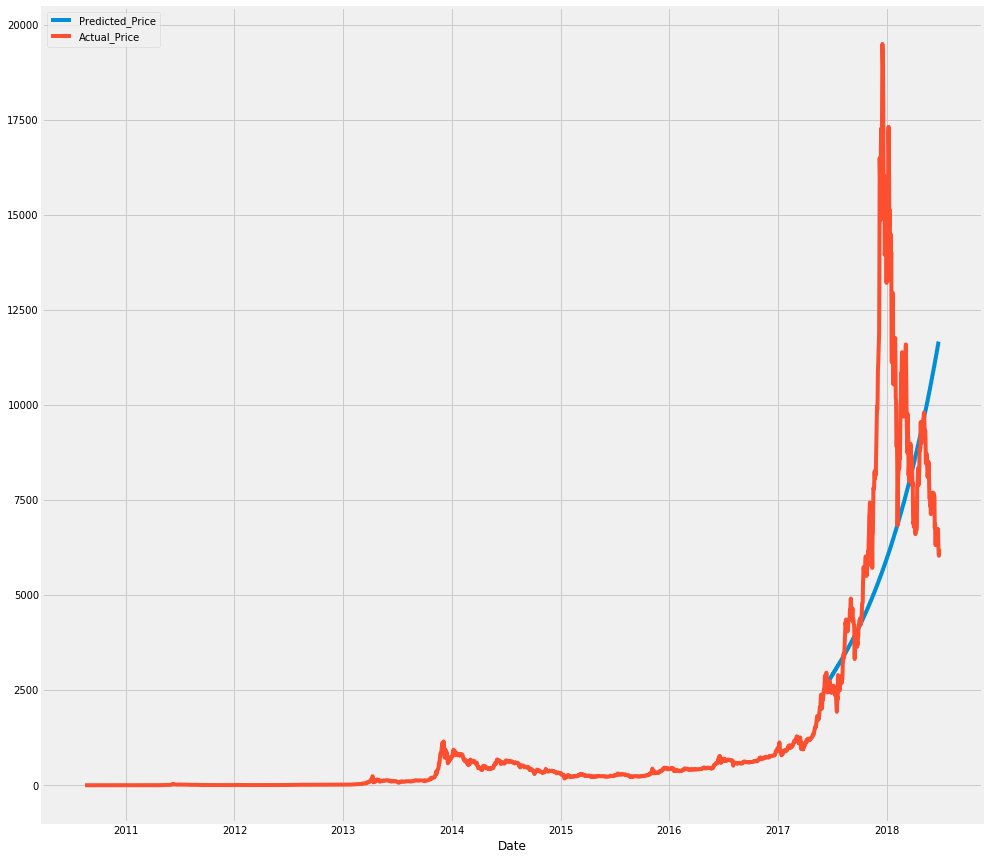

In [100]:
fig, ax=plt.subplots(figsize=(15,15))

#full_results_ARIMA.plot_predict(start=2500, end=2868, ax=ax, dynamic=True, alpha=0.05)
predicted_full_arima.plot(ax=ax, label='Predicted_Price', legend=True)
np.exp(btc_price_df['log_price']).plot(ax=ax, label='Actual_Price', legend=True)

In [101]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

### Fbprophet 

In [102]:
from fbprophet import Prophet

In [103]:
btc_price_df.head()

,BCHAIN/MKPRU,log_price,price_diff,log_price_diff
Date,,,,
2010-08-17,0.076900,-2.565249,NaN,NaN
2010-08-18,0.074000,-2.603690,-0.002900,-0.038441
2010-08-19,0.068800,-2.676552,-0.005200,-0.072861
2010-08-20,0.066700,-2.707550,-0.002100,-0.030999
2010-08-21,0.066899,-2.704571,0.000199,0.002979


In [104]:
train_fp =pd.DataFrame(btc_price_df["log_price_diff"].loc['2010-08-17':'2018-05-30'])
test_fp = pd.DataFrame(btc_price_df["log_price_diff"].loc['2018-06-01':])

In [105]:
log_price = pd.DataFrame(btc_price_df["log_price"].loc['2018-06-01':])

In [106]:
train_fp.dropna(inplace=True)
test_fp.dropna(inplace=True)

In [107]:
train_fp.reset_index(inplace=True)

In [108]:
train_fp['Date']=pd.DatetimeIndex(train_fp['Date'])

In [109]:
train_fp.rename(columns={'Date': 'ds',
                       'log_price_diff': 'y'}, inplace=True)

In [110]:
train_fp.dropna(inplace=True)

In [111]:
train_fp.head()

,ds,y
0,2010-08-18,-0.038441
1,2010-08-19,-0.072861
2,2010-08-20,-0.030999
3,2010-08-21,0.002979
4,2010-08-22,-0.007487


In [112]:
test_fp.reset_index(inplace=True)

In [113]:
test_fp.head()

,Date,log_price_diff
0,2018-06-01,0.014256
1,2018-06-02,0.005818
2,2018-06-03,0.014493
3,2018-06-04,0.007134
4,2018-06-05,-0.026266


In [114]:
test_fp['Date']=pd.DatetimeIndex(test_fp['Date'])
test_fp.rename(columns={'Date': 'ds',
                       'log_price_diff': 'y'}, inplace=True)
test_fp.dropna(inplace=True)

In [115]:
test_fp.head()

,ds,y
0,2018-06-01,0.014256
1,2018-06-02,0.005818
2,2018-06-03,0.014493
3,2018-06-04,0.007134
4,2018-06-05,-0.026266


In [116]:
test_fp_ds=test_fp.drop(['y'], axis=1)

In [117]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, daily_seasonality=True)

In [118]:
my_model.fit(train_fp)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [119]:
# future_dates = my_model.make_future_dataframe(periods=30, freq='D')

In [120]:
forecast =my_model.predict(test_fp_ds)

In [121]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-06-01,-0.035893,-0.101863,0.143781,-0.035893,-0.035893,0.052044,0.052044,0.052044,0.039252,...,0.002696,0.002696,0.002696,0.010096,0.010096,0.010096,0.0,0.0,0.0,0.016152
1,2018-06-02,-0.035891,-0.113163,0.121927,-0.035891,-0.035891,0.048605,0.048605,0.048605,0.039252,...,-0.000551,-0.000551,-0.000551,0.009904,0.009904,0.009904,0.0,0.0,0.0,0.012714
2,2018-06-03,-0.035889,-0.119770,0.137458,-0.035889,-0.035889,0.047869,0.047869,0.047869,0.039252,...,-0.000958,-0.000958,-0.000958,0.009575,0.009575,0.009575,0.0,0.0,0.0,0.011980
3,2018-06-04,-0.035887,-0.108181,0.143117,-0.035887,-0.035887,0.047589,0.047589,0.047589,0.039252,...,-0.000773,-0.000773,-0.000773,0.009111,0.009111,0.009111,0.0,0.0,0.0,0.011702
4,2018-06-05,-0.035886,-0.108956,0.140464,-0.035886,-0.035886,0.050945,0.050945,0.050945,0.039252,...,0.003178,0.003178,0.003178,0.008516,0.008516,0.008516,0.0,0.0,0.0,0.015059


In [122]:
forecast_df=forecast[['ds', 'yhat','yhat_lower','yhat_upper']].set_index('ds')

In [123]:
forecast_df.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2018-06-01,0.016152,-0.101863,0.143781
2018-06-02,0.012714,-0.113163,0.121927
2018-06-03,0.011980,-0.119770,0.137458
2018-06-04,0.011702,-0.108181,0.143117
2018-06-05,0.015059,-0.108956,0.140464


In [124]:
test_fp['ds']=pd.DatetimeIndex(test_fp['ds'])

In [125]:
test_fp.set_index(test_fp['ds'], inplace=True)

In [126]:
forecasted=pd.merge(test_fp, forecast_df, how = 'inner', left_on='ds', right_on='ds' )

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'ds' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
forecasted.set_index('ds', inplace=True)

In [128]:
forecasted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2018-06-01 to 2018-06-26
Data columns (total 4 columns):
y             26 non-null float64
yhat          26 non-null float64
yhat_lower    26 non-null float64
yhat_upper    26 non-null float64
dtypes: float64(4)
memory usage: 1.0 KB


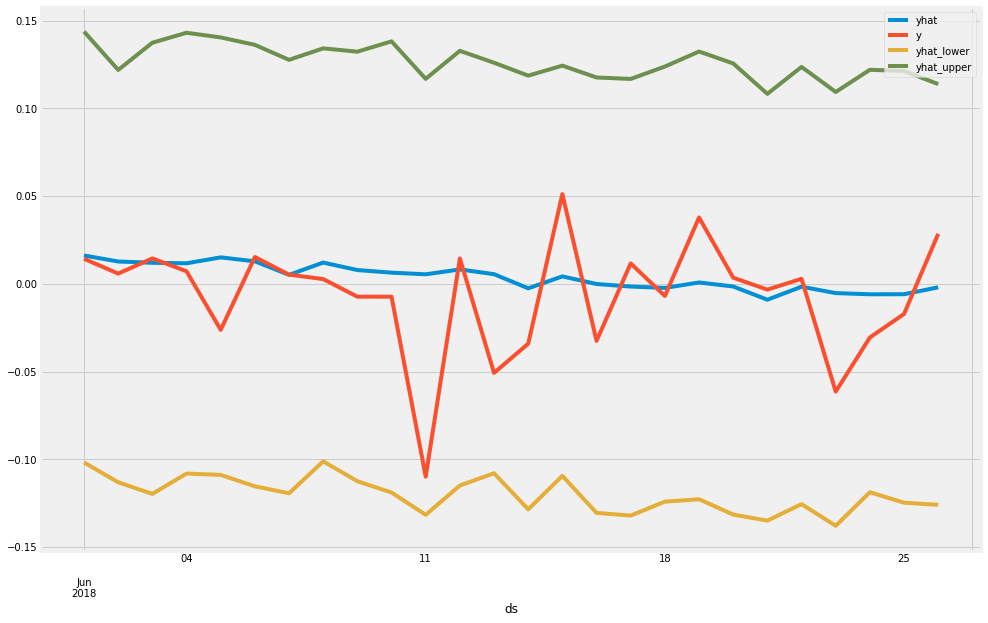

In [129]:
fig, ax=plt.subplots(figsize=(15,10))
forecasted[['yhat','y','yhat_lower','yhat_upper']].plot(ax=ax)

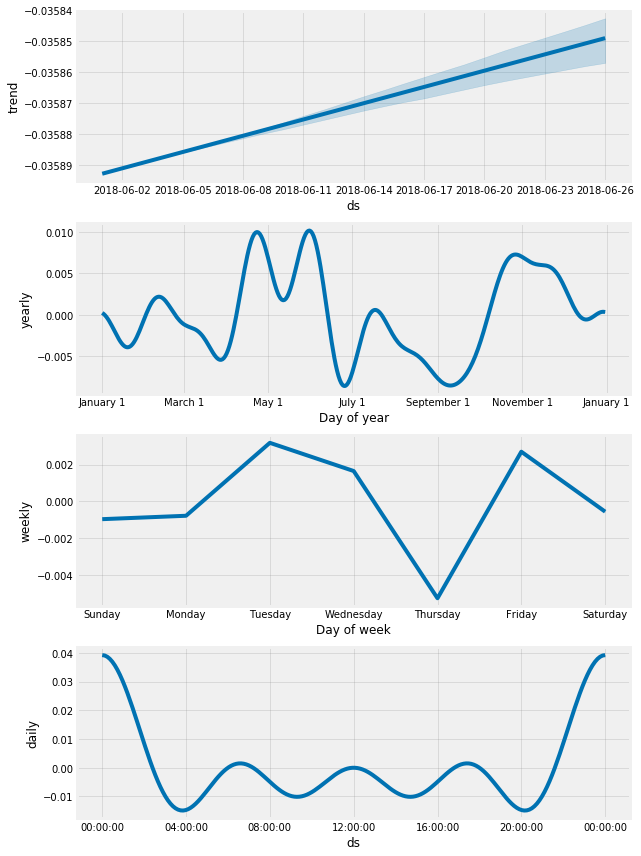

In [130]:
fig=my_model.plot_components(forecast)

In [131]:
rmse = sqrt(mean_squared_error(forecasted['y'], forecasted['yhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.034


In [132]:
forecasted.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2018-06-01,0.014256,0.016152,-0.101863,0.143781
2018-06-02,0.005818,0.012714,-0.113163,0.121927
2018-06-03,0.014493,0.011980,-0.119770,0.137458
2018-06-04,0.007134,0.011702,-0.108181,0.143117
2018-06-05,-0.026266,0.015059,-0.108956,0.140464


## ARIMAX Modeling

### Future Selection for ARIMAX Modeling

In [133]:
btc_df=pd.read_csv('final_btc.csv')

In [134]:
#btc_df.info()

In [135]:
btc_df=btc_df[btc_df["BCHAIN/MKPRU"]>0]

In [136]:
btc_df['Date']=pd.DatetimeIndex(btc_df['Date'])

In [137]:
btc_df.set_index('Date', inplace=True)

In [138]:
# Train the Scaler with training data and smooth data

In [139]:
btc_x=btc_df.drop('BCHAIN/MKPRU', axis=1)

###  Linear regression to detect Multicolinearity 

Let us normalize the endogeneous variables. 

In [140]:
btc_x=btc_df.drop('BCHAIN/MKPRU', axis=1)

In [141]:
btc_x.columns

Index(['USD/CNY Close', 'EUR/USD Close', 'USD/JPY Close', 'BCHAIN/TOTBC',
       'BCHAIN/MKTCP', 'BCHAIN/TRFEE', 'BCHAIN/TRFUS', 'BCHAIN/NTRAN',
       'BCHAIN/NTRAT', 'BCHAIN/NTREP', 'BCHAIN/NADDU', 'BCHAIN/NTRBL',
       'BCHAIN/TOUTV', 'BCHAIN/ETRAV', 'BCHAIN/ETRVU', 'BCHAIN/TRVOU',
       'BCHAIN/CPTRV', 'BCHAIN/CPTRA', 'BCHAIN/HRATE', 'BCHAIN/MIREV',
       'BCHAIN/ATRCT', 'BCHAIN/BLCHS', 'BCHAIN/AVBLS', 'BCHAIN/MWTRV',
       'BCHAIN/MWNUS', 'BCHAIN/MWNTD', 'BCHAIN/DIFF', 'gold_price',
       'sp_closing_price', 'vix_closing_price'],
      dtype='object')

In [142]:
cols_to_norm=['USD/CNY Close', 'EUR/USD Close', 'USD/JPY Close', 'BCHAIN/TOTBC',
       'BCHAIN/MKTCP', 'BCHAIN/TRFEE', 'BCHAIN/TRFUS', 'BCHAIN/NTRAN',
       'BCHAIN/NTRAT', 'BCHAIN/NTREP', 'BCHAIN/NADDU', 'BCHAIN/NTRBL',
       'BCHAIN/TOUTV', 'BCHAIN/ETRAV', 'BCHAIN/ETRVU', 'BCHAIN/TRVOU',
       'BCHAIN/CPTRV', 'BCHAIN/CPTRA', 'BCHAIN/HRATE', 'BCHAIN/MIREV',
       'BCHAIN/ATRCT', 'BCHAIN/BLCHS', 'BCHAIN/AVBLS', 'BCHAIN/MWTRV',
       'BCHAIN/MWNUS', 'BCHAIN/MWNTD', 'BCHAIN/DIFF', 'gold_price',
       'sp_closing_price', 'vix_closing_price']

In [143]:
btc_x[cols_to_norm] = btc_x[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [144]:
btc_x.head()

,USD/CNY Close,EUR/USD Close,USD/JPY Close,BCHAIN/TOTBC,BCHAIN/MKTCP,BCHAIN/TRFEE,BCHAIN/TRFUS,BCHAIN/NTRAN,BCHAIN/NTRAT,BCHAIN/NTREP,...,BCHAIN/ATRCT,BCHAIN/BLCHS,BCHAIN/AVBLS,BCHAIN/MWTRV,BCHAIN/MWNUS,BCHAIN/MWNTD,BCHAIN/DIFF,gold_price,sp_closing_price,vix_closing_price
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-17,0.822007,0.561088,0.195324,0.000000,1.489878e-07,0.000448,2.267255e-09,0.000171,0.000000,0.000179,...,0.0,0.0,0.000451,0.0,0.0,0.0,0.0,0.207649,0.024824,0.390890
2010-08-18,0.817549,0.556586,0.194523,0.000497,1.172407e-07,0.001043,5.079904e-09,0.000222,0.000001,0.000232,...,0.0,0.0,0.001322,0.0,0.0,0.0,0.0,0.203807,0.025711,0.397581
2010-08-19,0.815483,0.547358,0.192319,0.001021,5.898157e-08,0.000000,0.000000e+00,0.000204,0.000002,0.000213,...,0.0,0.0,0.000241,0.0,0.0,0.0,0.0,0.209717,0.015562,0.445188
2010-08-20,0.816353,0.522373,0.199531,0.001645,3.651885e-08,0.000000,0.000000e+00,0.000265,0.000004,0.000276,...,0.0,0.0,0.000184,0.0,0.0,0.0,0.0,0.212673,0.013403,0.420741
2010-08-21,0.816353,0.522373,0.199531,0.002333,4.069909e-08,0.000000,0.000000e+00,0.000163,0.000005,0.000170,...,0.0,0.0,0.000081,0.0,0.0,0.0,0.0,0.212673,0.013403,0.420741


In [145]:
X = btc_x.values
y = btc_df['BCHAIN/MKPRU'].values

In [146]:
#Splitting the data into training and test sets

# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [147]:
print (X.shape,y.shape)


(2871, 30) (2871,)


In [148]:
import statsmodels.api as sma
X = sma.add_constant(X) ## let's add an intercept (beta_0) to our model

In [149]:
import statsmodels.formula.api as sm
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.695e+06
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:08:20   Log-Likelihood:                -12854.
No. Observations:                2871   AIC:                         2.577e+04
Df Residuals:                    2840   BIC:                         2.596e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1113      8.895      2.823      0.005       7.669      42.553
x1           -56.2298      6.563     -8.568      0.000     -69.099     -43.361
x2            32.1267      5.093      6.308      0.000      22.140      42.114
x3           -13.1798      6.982     -1.888      0.059     -26.870       0.510
x4           -94.2478     14.820     -6.360      0.000    -123.307     -65.189
x5          1.853e+04     46.167    401.421      0.000    1.84e+04    1.86e+04
x6           -36.6970     18.125     -2.025      0.043     -72.237      -1.157
x7          -462.5183     34.890    -13.256      0.000    -530.931    -394.106
x8           -72.5278     24.933     -2.909      0.004    -121.416     -23.640
x9          2246.1848    144.811     15.511      0.000    1962.239    2530.130
x10           33.7040     20.737      1.625      0.104      -6.957      74.365
x11          152.9913     21.607      7.081      0.000     110.625     195.357
x12           36.6911     10.737      3.417      0.001      15.638      57.744
x13            7.1403      9.326      0.766      0.444     -11.146      25.427
x14            3.4313      9.561      0.359      0.720     -15.317      22.179
x15           82.2758     17.801      4.622      0.000      47.372     117.179
x16           24.5346     14.994      1.636      0.102      -4.865      53.934
x17           15.6765      8.909      1.760      0.079      -1.791      33.144
x18          346.6076     11.419     30.352      0.000     324.216     368.999
x19         -809.0097     41.443    -19.521      0.000    -890.271    -727.749
x20          872.9663     64.498     13.535      0.000     746.499     999.434
x21           54.4923      7.804      6.983      0.000      39.190      69.794
x22        -1595.6774    134.840    -11.834      0.000   -1860.072   -1331.283
x23           -1.2793      7.878     -0.162      0.871     -16.727      14.168
x24          -10.4309     13.641     -0.765      0.445     -37.177      16.316
x25         -623.4672     77.041     -8.093      0.000    -774.529    -472.406
x26           23.1288      3.819      6.056      0.000      15.640      30.618
x27          546.1784     39.116     13.963      0.000     469.481     622.876
x28          -16.6419      5.742     -2.898      0.004     -27.900      -5.384
x29          -68.7542     19.329     -3.557      0.000    -106.654     -30.854
x30          -13.7725      5.464     -2.520      0.012     -24.487      -3.058
==============================================================================
Omnibus:                     3406.562   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1943153.045
Skew:                          -5.555   Prob(JB):                         0.00
Kurtosis:                     129.966   Cond. No.                         885.
==

**The above OLS estimation is a clear indication of multicolinearity.**

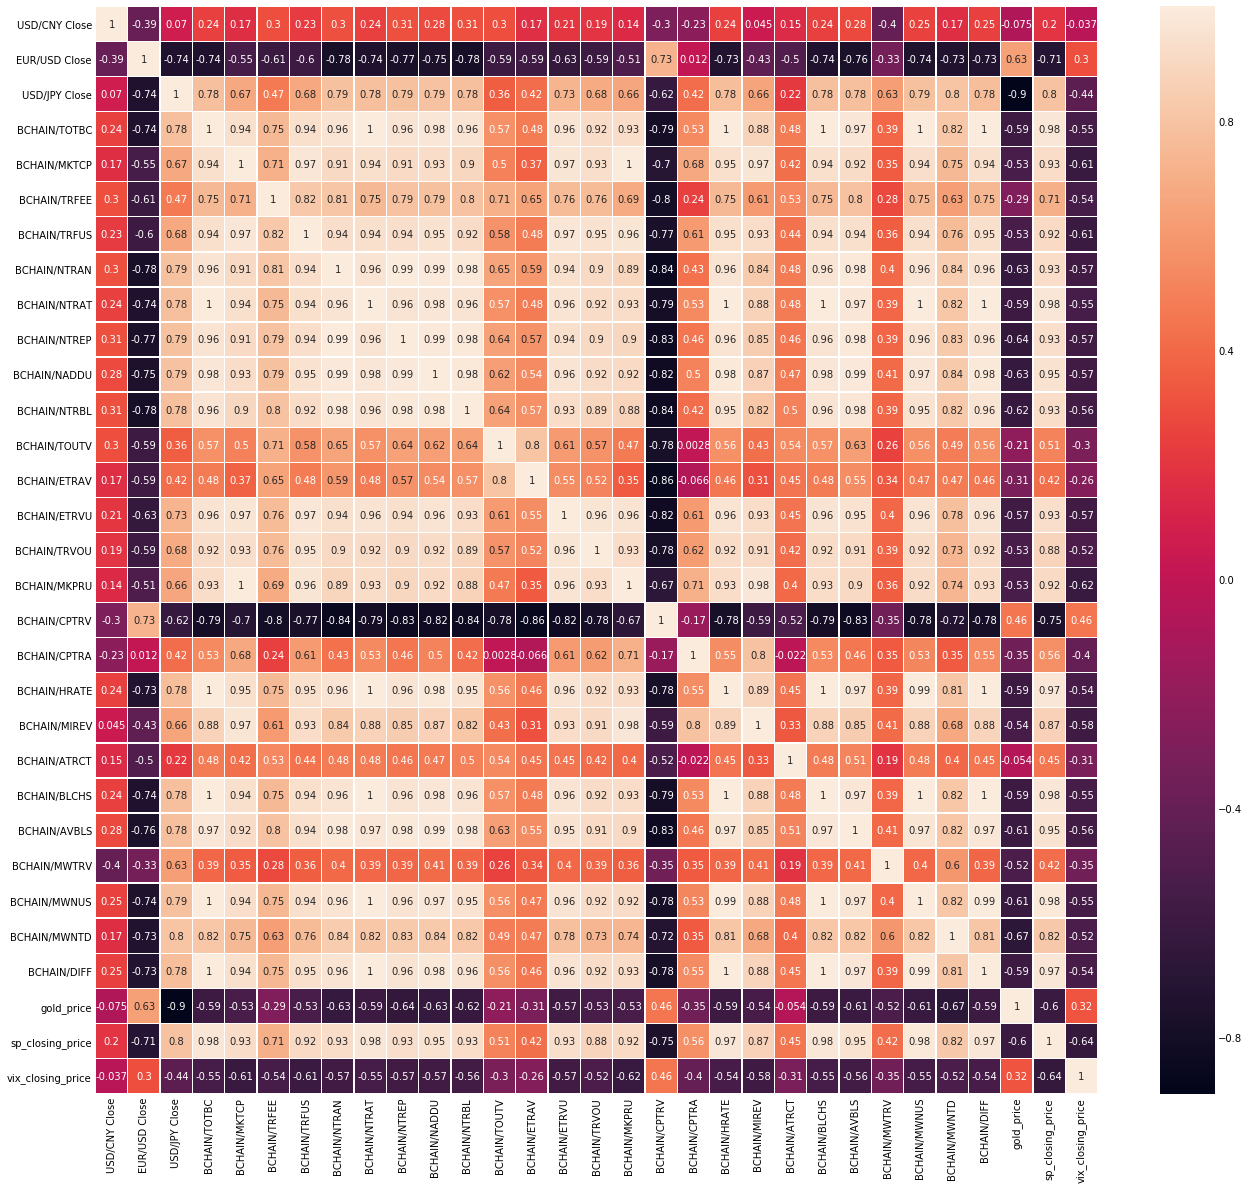

In [150]:
# Get correlation matrix of the meat DataFrame
btc_df_corr = btc_df.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(btc_df_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [151]:
btc_vif=btc_x.drop(['BCHAIN/TOTBC',
       'BCHAIN/MKTCP', 'BCHAIN/NTRAN',
       'BCHAIN/NTRAT', 'BCHAIN/NTREP', 'BCHAIN/NADDU',  'BCHAIN/HRATE',
       'BCHAIN/MIREV',  'BCHAIN/BLCHS',  'BCHAIN/MWNUS'], axis=1)

In [152]:
X2 = btc_vif.values
y = btc_df['BCHAIN/MKPRU'].values

In [153]:
X2 = sma.add_constant(X2) ## let's add an intercept (beta_0) to our model

In [154]:
lm2 = sm.OLS(y,X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6279.
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:08:22   Log-Likelihood:                -21445.
No. Observations:                2871   AIC:                         4.293e+04
Df Residuals:                    2850   BIC:                         4.306e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -379.1161    137.240     -2.762      0.006    -648.216    -110.017
x1            16.1548     82.879      0.195      0.845    -146.354     178.663
x2          -441.4559     90.791     -4.862      0.000    -619.478    -263.434
x3           -92.5708    134.416     -0.689      0.491    -356.134     170.992
x4         -2969.8105    278.600    -10.660      0.000   -3516.089   -2423.532
x5          7424.7521    391.703     18.955      0.000    6656.702    8192.802
x6          -533.0889    154.253     -3.456      0.001    -835.548    -230.630
x7          -543.7304    180.288     -3.016      0.003    -897.238    -190.223
x8          -630.1495    188.444     -3.344      0.001    -999.650    -260.650
x9          1.178e+04    238.648     49.361      0.000    1.13e+04    1.22e+04
x10          -57.1065    287.903     -0.198      0.843    -621.625     507.412
x11          791.7718    167.622      4.724      0.000     463.098    1120.445
x12         4808.7849    152.030     31.630      0.000    4510.685    5106.885
x13          -38.0435    135.964     -0.280      0.780    -304.640     228.553
x14         1177.2039    134.744      8.737      0.000     912.999    1441.409
x15          185.7576    269.138      0.690      0.490    -341.968     713.483
x16          190.8156     71.101      2.684      0.007      51.401     330.231
x17         4679.4471    106.453     43.958      0.000    4470.715    4888.179
x18          877.4854    101.490      8.646      0.000     678.485    1076.486
x19         -240.4671    207.150     -1.161      0.246    -646.647     165.712
x20          -95.2194     87.395     -1.090      0.276    -266.583      76.144
==============================================================================
Omnibus:                      682.178   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29887.726
Skew:                           0.284   Prob(JB):                         0.00
Kurtosis:                      18.796   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
len(btc_x.columns)

30

In [156]:
vif2=[variance_inflation_factor(X2, j) for j in range(X2.shape[1])]
vif2 = pd.concat([pd.DataFrame(btc_vif.columns),pd.DataFrame(np.transpose(vif2))], axis = 1)
#vif2

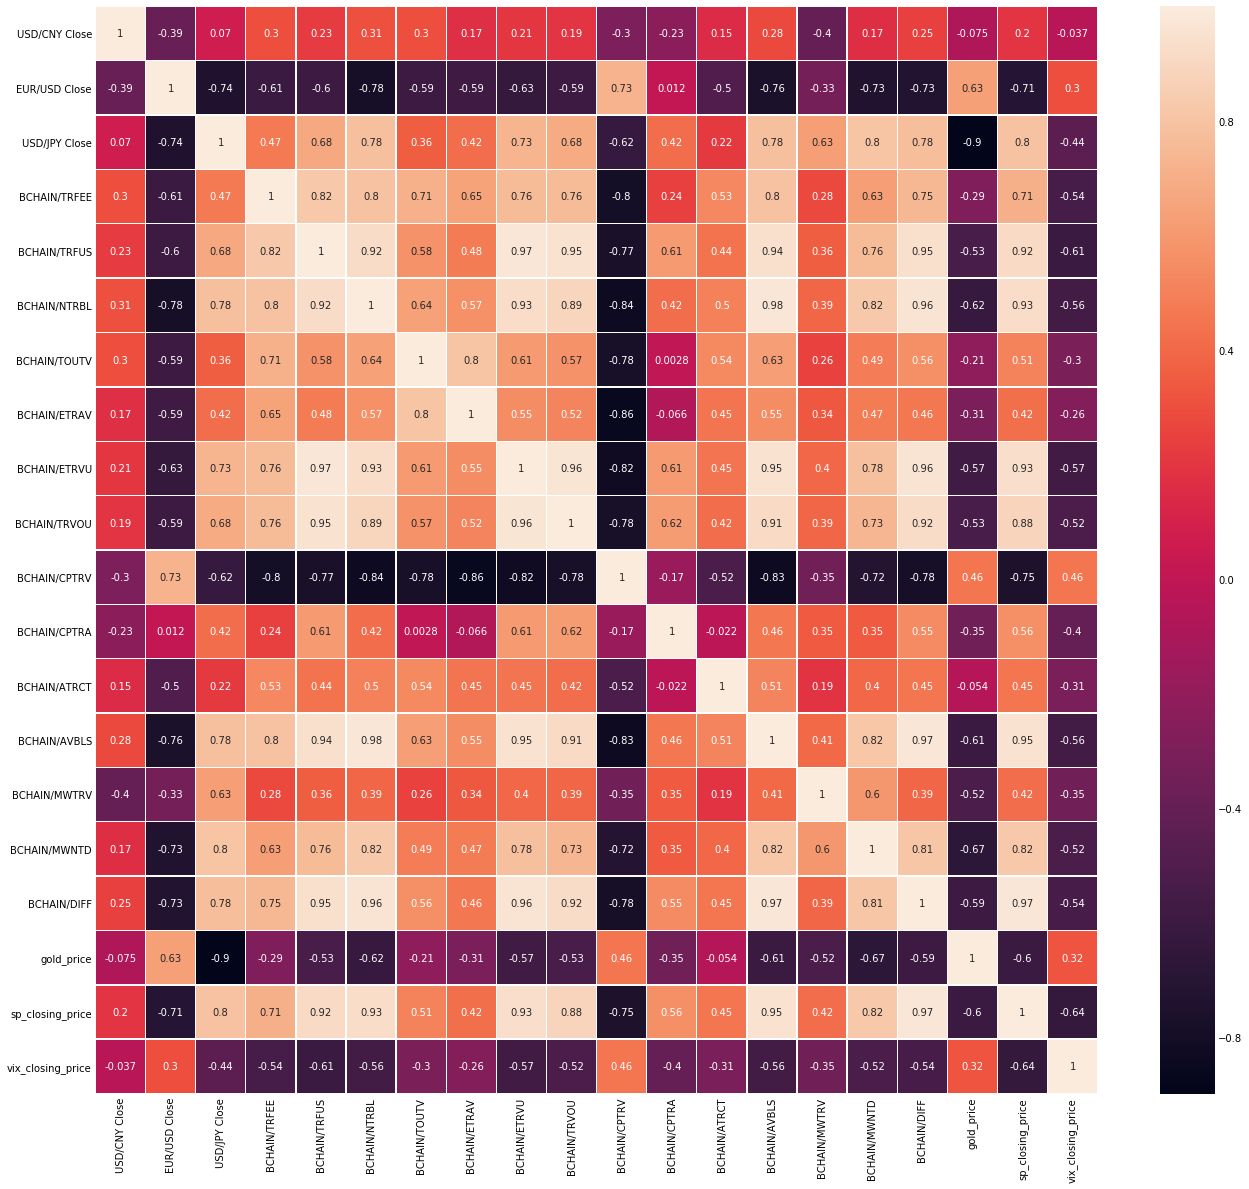

In [157]:
# Get correlation matrix of  DataFrame
btc_vif_corr = btc_vif.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(btc_vif_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [158]:
btc_vif_II=btc_vif.drop(['sp_closing_price','BCHAIN/AVBLS','BCHAIN/NTRBL','USD/JPY Close'], axis=1)

In [159]:
X3 = btc_vif_II.values
y = btc_df['BCHAIN/MKPRU'].values

In [160]:
X3 = sma.add_constant(X3) ## let's add an intercept (beta_0) to our model

In [161]:
lm3 = sm.OLS(y,X3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     7606.
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:08:24   Log-Likelihood:                -21491.
No. Observations:                2871   AIC:                         4.302e+04
Df Residuals:                    2854   BIC:                         4.312e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -318.9284     57.082     -5.587      0.000    -430.855    -207.002
x1           289.4623     52.666      5.496      0.000     186.195     392.729
x2          -717.3893     72.187     -9.938      0.000    -858.933    -575.846
x3         -2403.7730    257.789     -9.325      0.000   -2909.245   -1898.301
x4          6300.3742    354.744     17.760      0.000    5604.793    6995.955
x5          -434.5227    180.512     -2.407      0.016    -788.470     -80.576
x6          -602.3699    190.911     -3.155      0.002    -976.708    -228.032
x7          1.217e+04    233.874     52.045      0.000    1.17e+04    1.26e+04
x8           135.4223    290.969      0.465      0.642    -435.108     705.952
x9           426.0882    152.652      2.791      0.005     126.770     725.407
x10         5117.2653    130.320     39.267      0.000    4861.735    5372.796
x11           34.1371    130.993      0.261      0.794    -222.713     290.987
x12          115.0511    270.819      0.425      0.671    -415.970     646.072
x13          180.5042     66.275      2.724      0.006      50.552     310.456
x14         4695.9820     93.761     50.084      0.000    4512.135    4879.829
x15          853.3439     67.420     12.657      0.000     721.147     985.541
x16          -15.8265     73.117     -0.216      0.829    -159.194     127.541
==============================================================================
Omnibus:                      689.467   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29965.879
Skew:                           0.310   Prob(JB):                         0.00
Kurtosis:                      18.815   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
vif3=[variance_inflation_factor(X3, j) for j in range(X3.shape[1])]
vif3 = pd.concat([pd.DataFrame(btc_vif_II.columns),pd.DataFrame(np.transpose(vif3))], axis = 1)
#vif3

In [163]:
btc_vif_III=btc_vif_II.drop(['USD/CNY Close','BCHAIN/TRVOU'], axis=1)

In [164]:
X4 = btc_vif_III.values
y = btc_df['BCHAIN/MKPRU'].values

In [165]:
X4 = sma.add_constant(X4) ## let's add an intercept (beta_0) to our model

In [166]:
lm4 = sm.OLS(y,X4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     8605.
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:08:24   Log-Likelihood:                -21506.
No. Observations:                2871   AIC:                         4.304e+04
Df Residuals:                    2856   BIC:                         4.313e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -200.5660     53.014     -3.783      0.000    -304.517     -96.615
x1          -805.0206     70.731    -11.381      0.000    -943.710    -666.331
x2         -1707.5021    224.435     -7.608      0.000   -2147.572   -1267.432
x3          5755.4650    337.782     17.039      0.000    5093.143    6417.787
x4          -363.5697    180.935     -2.009      0.045    -718.347      -8.792
x5          -599.0167    191.788     -3.123      0.002    -975.075    -222.959
x6          1.237e+04    195.091     63.396      0.000     1.2e+04    1.28e+04
x7           785.6221    138.601      5.668      0.000     513.854    1057.390
x8          4934.6381    126.575     38.986      0.000    4686.450    5182.826
x9          -140.3692    127.489     -1.101      0.271    -390.350     109.611
x10         -137.3522    268.158     -0.512      0.609    -663.156     388.452
x11          255.0663     65.122      3.917      0.000     127.376     382.757
x12         4798.1295     91.518     52.428      0.000    4618.682    4977.577
x13          904.9468     67.062     13.494      0.000     773.452    1036.442
x14           -0.1616     72.744     -0.002      0.998    -142.797     142.474
==============================================================================
Omnibus:                      717.938   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31242.472
Skew:                           0.385   Prob(JB):                         0.00
Kurtosis:                      19.142   Cond. No.                         58.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
vif4=[variance_inflation_factor(X4, j) for j in range(X4.shape[1])]
vif4 = pd.concat([pd.DataFrame(btc_vif_III.columns),pd.DataFrame(np.transpose(vif4))], axis = 1)
vif4

,0,0
0,EUR/USD Close,42.708415
1,BCHAIN/TRFEE,5.073313
2,BCHAIN/TRFUS,4.733516
3,BCHAIN/TOUTV,6.447819
4,BCHAIN/ETRAV,1.204971
5,BCHAIN/ETRVU,1.170936
6,BCHAIN/CPTRV,6.708381
7,BCHAIN/CPTRA,1.580446
8,BCHAIN/ATRCT,6.276515
9,BCHAIN/MWTRV,2.346304


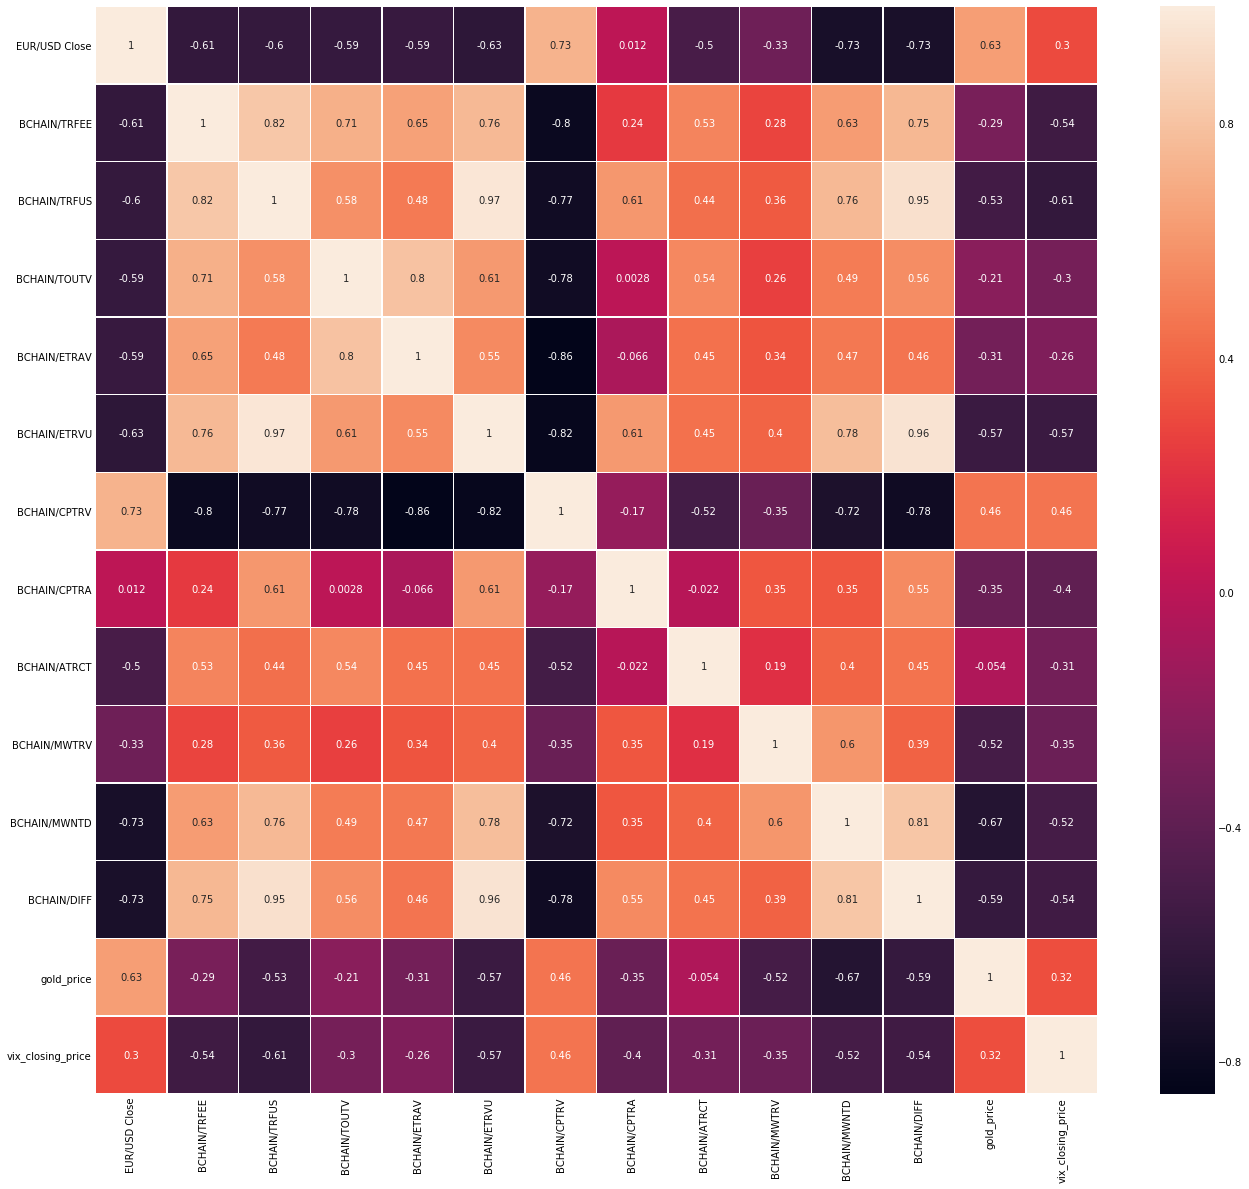

In [168]:
# Get correlation matrix of  DataFrame
btc_vif_III_corr = btc_vif_III.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(btc_vif_III_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [169]:
# Define the final Data Frame both exogeneous and Endogenous 

In [170]:
btc_vif_III.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2010-08-17 to 2018-06-26
Freq: D
Data columns (total 14 columns):
EUR/USD Close        2871 non-null float64
BCHAIN/TRFEE         2871 non-null float64
BCHAIN/TRFUS         2871 non-null float64
BCHAIN/TOUTV         2871 non-null float64
BCHAIN/ETRAV         2871 non-null float64
BCHAIN/ETRVU         2871 non-null float64
BCHAIN/CPTRV         2871 non-null float64
BCHAIN/CPTRA         2871 non-null float64
BCHAIN/ATRCT         2871 non-null float64
BCHAIN/MWTRV         2871 non-null float64
BCHAIN/MWNTD         2871 non-null float64
BCHAIN/DIFF          2871 non-null float64
gold_price           2871 non-null float64
vix_closing_price    2871 non-null float64
dtypes: float64(14)
memory usage: 336.4 KB


### Estimation of  ARIMAX

In [171]:
btc_vif_III.columns

Index(['EUR/USD Close', 'BCHAIN/TRFEE', 'BCHAIN/TRFUS', 'BCHAIN/TOUTV',
       'BCHAIN/ETRAV', 'BCHAIN/ETRVU', 'BCHAIN/CPTRV', 'BCHAIN/CPTRA',
       'BCHAIN/ATRCT', 'BCHAIN/MWTRV', 'BCHAIN/MWNTD', 'BCHAIN/DIFF',
       'gold_price', 'vix_closing_price'],
      dtype='object')

In [172]:
columns=['EUR/USD Close', 'BCHAIN/TRFEE', 'BCHAIN/TRFUS', 'BCHAIN/TOUTV',
       'BCHAIN/ETRAV', 'BCHAIN/ETRVU', 'BCHAIN/CPTRV', 'BCHAIN/CPTRA',
       'BCHAIN/ATRCT', 'BCHAIN/MWTRV', 'BCHAIN/MWNTD', 'BCHAIN/DIFF',
       'gold_price', 'vix_closing_price', 'BCHAIN/MKPRU']

In [173]:
btc_final_df=btc_df[columns]

In [174]:
btc_final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2010-08-17 to 2018-06-26
Freq: D
Data columns (total 15 columns):
EUR/USD Close        2871 non-null float64
BCHAIN/TRFEE         2871 non-null float64
BCHAIN/TRFUS         2871 non-null float64
BCHAIN/TOUTV         2871 non-null float64
BCHAIN/ETRAV         2871 non-null float64
BCHAIN/ETRVU         2871 non-null float64
BCHAIN/CPTRV         2871 non-null float64
BCHAIN/CPTRA         2871 non-null float64
BCHAIN/ATRCT         2871 non-null float64
BCHAIN/MWTRV         2871 non-null float64
BCHAIN/MWNTD         2871 non-null float64
BCHAIN/DIFF          2871 non-null float64
gold_price           2871 non-null float64
vix_closing_price    2871 non-null float64
BCHAIN/MKPRU         2871 non-null float64
dtypes: float64(15)
memory usage: 358.9 KB


In [175]:
btc_final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
EUR/USD Close,2871.0,1.243136e+00,1.147900e-01,1.038720,1.126145e+00,1.261300e+00,1.339400e+00,1.483000e+00
BCHAIN/TRFEE,2871.0,6.346880e+01,1.176608e+02,0.000000,1.201890e+01,2.463261e+01,5.260579e+01,1.495946e+03
BCHAIN/TRFUS,2871.0,2.934748e+05,1.386066e+06,0.000000,2.397240e+02,5.466663e+03,3.592248e+04,2.272484e+07
BCHAIN/TOUTV,2871.0,1.644836e+06,2.263060e+06,17622.840000,6.290582e+05,1.201448e+06,2.044596e+06,4.599222e+07
BCHAIN/ETRAV,2871.0,2.118801e+05,2.663756e+05,6221.000000,1.099450e+05,1.816510e+05,2.599272e+05,5.825066e+06
BCHAIN/ETRVU,2871.0,2.600935e+08,6.204764e+08,527.000000,2.193508e+06,4.856788e+07,1.674950e+08,5.760245e+09
BCHAIN/CPTRV,2871.0,5.403438e+00,1.052696e+01,0.136531,1.157135e+00,2.155312e+00,4.589164e+00,1.431794e+02
BCHAIN/CPTRA,2871.0,1.921961e+01,2.594389e+01,0.134860,5.210750e+00,8.489658e+00,2.099751e+01,1.616861e+02
BCHAIN/ATRCT,2871.0,8.107373e+00,4.653220e+00,0.000000,6.750000e+00,8.150000e+00,1.064167e+01,4.773333e+01
BCHAIN/MWTRV,2871.0,1.156597e+05,2.730035e+05,0.000000,0.000000e+00,6.343452e+04,1.609716e+05,8.484600e+06


In [176]:
btc_log=btc_final_df.apply(np.log)

In [177]:
y=btc_log['BCHAIN/MKPRU']

In [178]:
X=btc_log.drop(['BCHAIN/MKPRU','BCHAIN/ATRCT','BCHAIN/MWTRV','BCHAIN/MWNTD'], axis=1) # The last three variables generate a significant missing valuesa and inf after log transformation and first difference.
# BCHAIN/ATRCT 2399 non-null float64
# BCHAIN/MWTRV 1981 non-null float64
# BCHAIN/MWNTD 2212 non-null float64

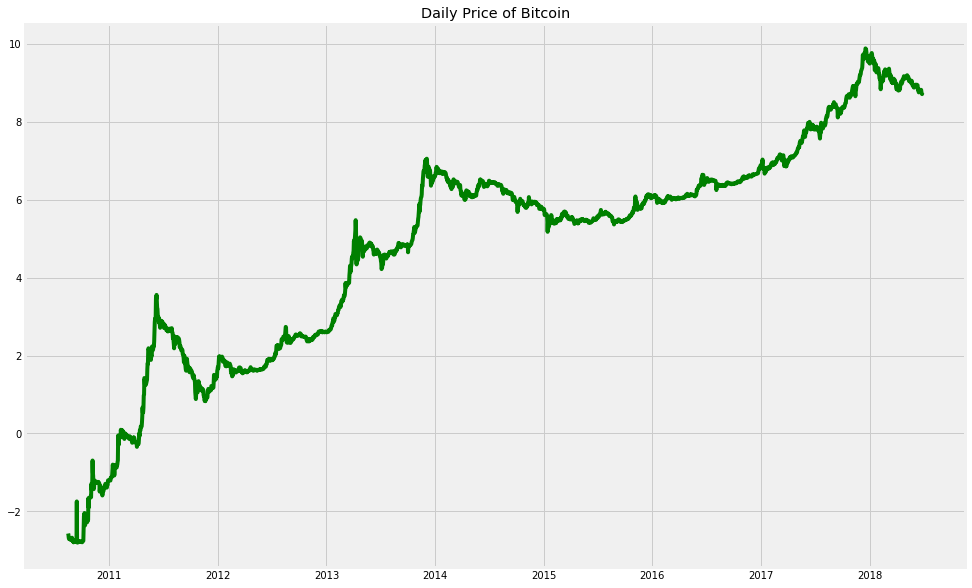

Results of Dickey-Fuller Test:
Test Statistic                   -2.570922
p-value                           0.099157
#Lags Used                       16.000000
Number of Observations Used    2854.000000
Critical Value (1%)              -3.432643
Critical Value (5%)              -2.862553
Critical Value (10%)             -2.567309
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [179]:
adf_test(y)

In [180]:
y_diff=btc_log['BCHAIN/MKPRU'].diff()

In [181]:
y_diff.describe()

count    2870.000000
mean        0.003937
std         0.063723
min        -1.039266
25%        -0.013708
50%         0.000965
75%         0.018673
max         1.004342
Name: BCHAIN/MKPRU, dtype: float64

In [182]:
y_diff.dropna(inplace=True)

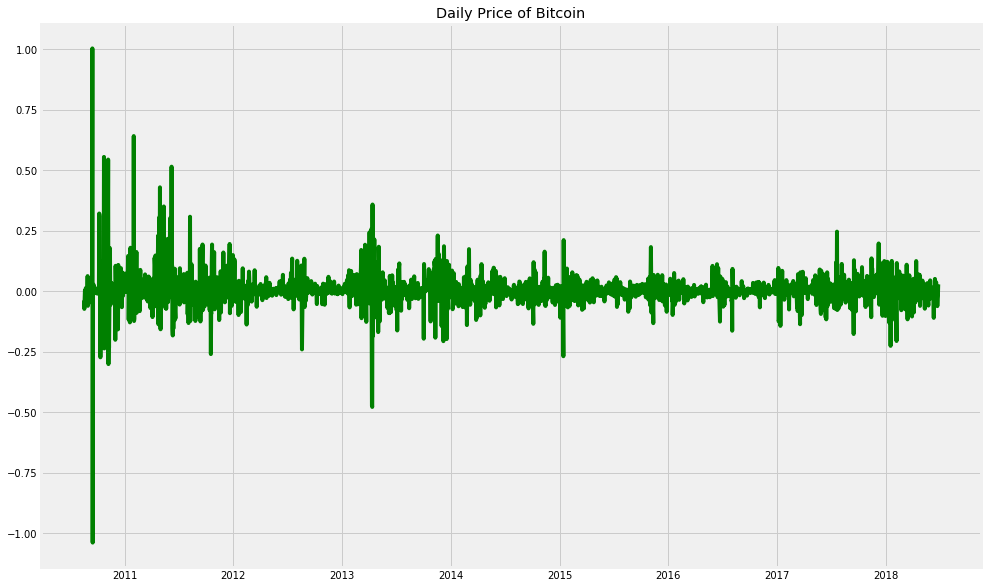

Results of Dickey-Fuller Test:
Test Statistic                -1.087471e+01
p-value                        1.340772e-19
#Lags Used                     1.500000e+01
Number of Observations Used    2.854000e+03
Critical Value (1%)           -3.432643e+00
Critical Value (5%)           -2.862553e+00
Critical Value (10%)          -2.567309e+00
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [183]:
adf_test(y_diff)

In [184]:
y_acf=acf(y_diff, nlags=40)
y_pacf=pacf(y_diff, nlags=40)

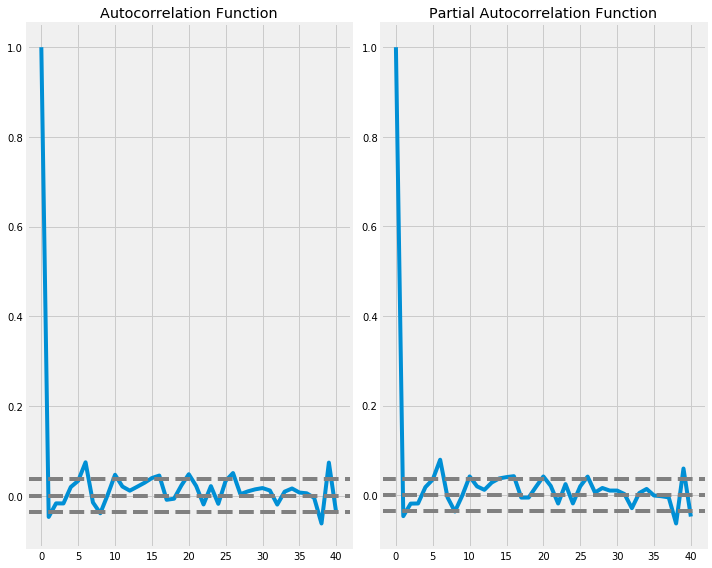

In [185]:
#Plot ACF: 
fig, ax=plt.subplots(figsize=(10,8))
plt.subplot(121) 
plt.plot(y_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: 
plt.subplot(122)
plt.plot(y_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [186]:
def diff(x):
     return x-x.shift(periods=1)
X_diff=X.apply(diff)
X_diff=add_constant(X_diff)

In [187]:
X_diff=X_diff.replace([np.inf, -np.inf], np.nan)
X_diff.fillna(method='bfill', inplace= True)

In [188]:
train_X =X_diff.loc['2010-08-17':'2018-05-30']
test_X = X_diff.loc['2018-06-01':]
train_y=y.loc['2010-08-17':'2018-05-30']
test_y=y.loc['2018-06-01':]

In [189]:
# Variables
exog=X_diff.values
endog=y

In [190]:
exog.shape

(2871, 12)

In [191]:
endog.shape

(2871,)

In [192]:
#nobs = endog.shape[0]
# Fit the model
mod = SARIMAX(endog=train_y, exog=train_X, order=(6,0,6))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:
c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:           BCHAIN/MKPRU   No. Observations:                 2844
Model:               SARIMAX(6, 0, 6)   Log Likelihood                3266.957
Date:                Mon, 23 Jul 2018   AIC                          -6483.914
Time:                        15:08:39   BIC                          -6335.090
Sample:                    08-17-2010   HQIC                         -6430.237
                         - 05-30-2018                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7767      1.974      2.420      0.016       0.908       8.646
EUR/USD Close        -5.2169      0.211    -24.768      0.000      -5.630      -4.804
BCHAIN/TRFEE         -0.

In [193]:
nobs = endog.shape[0]
mod = SARIMAX(endog, exog=exog, order=(6,0,6))
res = mod.filter(fit_res.params)

Text(0.5,1,'RMSE: 185.3599')

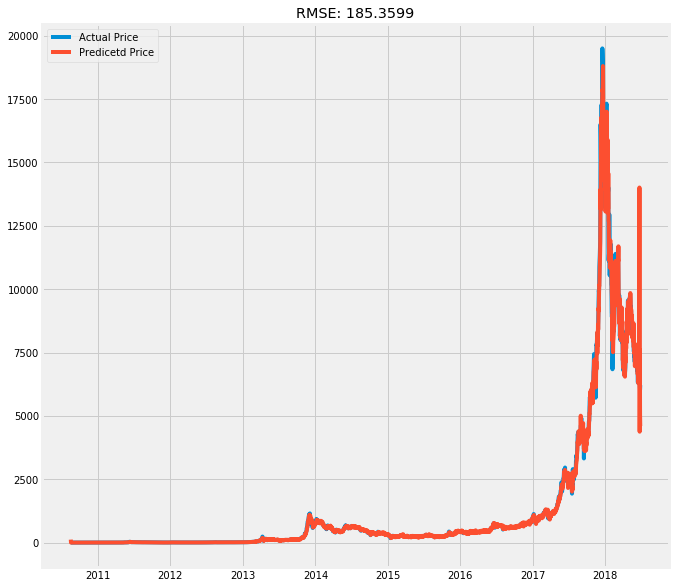

In [260]:
predicted_arimax=np.exp(pd.Series(res.fittedvalues, copy=True))

fig, ax=plt.subplots(figsize=(10,10))

plt.plot(btc_price_df['BCHAIN/MKPRU'], label="Actual Price")
plt.plot(predicted_arimax, label='Predicetd Price')
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_arimax-btc_price_df['BCHAIN/MKPRU'].loc[:'2018-05-30']).fillna(0)**2)/len(btc_price_df['BCHAIN/MKPRU'].loc[:'2018-05-30'])))

In [194]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [195]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='2018-06-01')
predict_dy_ci = predict_dy.conf_int()

Text(0.5,1,'RMSE_one_step: 1570.5818')
Text(0.5,1,'RMSE_dynamic_forecast: 1992.5362')


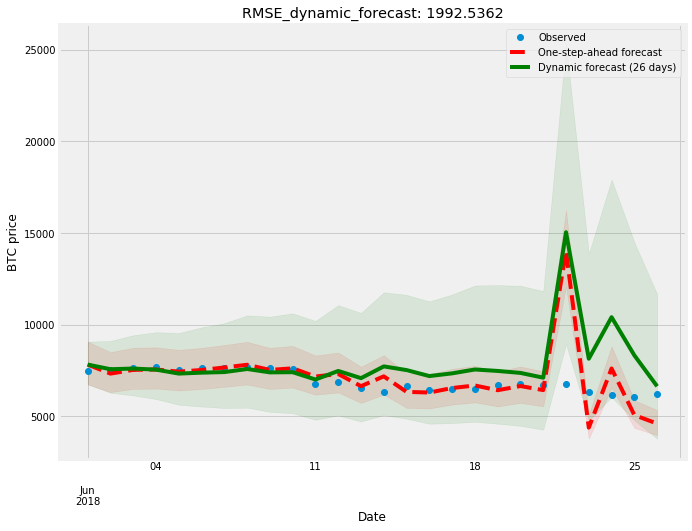

In [258]:
# Graph
fig, ax = plt.subplots(figsize=(10,8))
npre = 4
ax.set(title='Predicted Price', xlabel='Date', ylabel='BTC price')

# Plot data points
np.exp(test_y).plot(ax=ax, style='o', label='Observed')

# Plot predictions
np.exp(predict.predicted_mean.loc['2018-06-01':]).plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = np.exp(predict_ci.loc['2018-06-01':])
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
np.exp(predict_dy.predicted_mean.loc['2018-06-01':]).plot(ax=ax, style='g', label='Dynamic forecast (26 days)')
ci = np.exp(predict_dy_ci.loc['2018-06-01':])
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='best')

print(plt.title('RMSE_one_step: %.4f'% np.sqrt(sum((np.exp(predict.predicted_mean.loc['2018-06-01':])-np.exp(test_y)).fillna(0)**2)/len(np.exp(test_y)))))

print(plt.title('RMSE_dynamic_forecast: %.4f'% np.sqrt(sum((np.exp(predict_dy.predicted_mean.loc['2018-06-01':])-np.exp(test_y)).fillna(0)**2)/len(np.exp(test_y)))))

In [197]:
rmse = sqrt(mean_squared_error(np.exp(test_y), np.exp(predict.predicted_mean.loc['2018-06-01':])))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1570.582


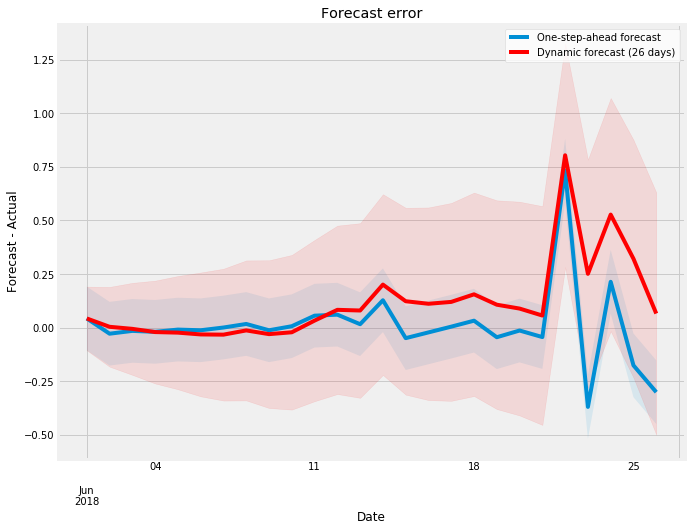

In [266]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(10,8))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['2018-06-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['2018-06-01':].copy()
ci.iloc[:,0] -= endog.loc['2018-06-01':]
ci.iloc[:,1] -= endog.loc['2018-06-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['2018-06-01':].plot(ax=ax, style='r', label='Dynamic forecast (26 days)')
ci = predict_dy_ci.loc['2018-06-01':].copy()
ci.iloc[:,0] -= endog.loc['2018-06-01':]
ci.iloc[:,1] -= endog.loc['2018-06-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='best');
legend.get_frame().set_facecolor('w')

# LSTM on Keras 

In [199]:
df=btc_price_df[['BCHAIN/MKPRU']]
df.reset_index(inplace=True)
df_norm=df.drop(['Date'], axis=1, inplace=True)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [200]:
#split training and test; the slicing can be done by using time. 
prediction_days=30

df_train=df[:len(df)-prediction_days]
df_test=df[len(df)-prediction_days:]

In [201]:
df_test.head()

,BCHAIN/MKPRU
2841,7361.831667
2842,7130.541667
2843,7459.876667
2844,7385.395000
2845,7491.434000


In [202]:
#Normalize and prepare for training
min_max_scaler = MinMaxScaler()
#We use fit_transform to center the data in a way that it has 0 mean and 1 standard error.

In [203]:
training_set=df_train.values
training_set=min_max_scaler.fit_transform(training_set)

In [204]:
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]

In [205]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [206]:
# Train Model
num_units=6 # the number of units(dimension of the output state) used for the LSTM cell
activation_function='sigmoid'# the activation function  used for LSTM cell
optimizer='adam'# the optimzer used to minimize the loss function
loss_function='mean_squared_error'# the loss function which we need to minimize while adjusting the weights abd biases of the network
batch_size=8 # neural networks are typically trained on batches which means that on every iteration we pick 5 examples from our training set and use them for training
num_epochs=300 # it determines how many iterations we need to make

In [207]:
# Initialize the RNN
regressor=Sequential() #define the Sequential model which stacks all layers (input, hidden and output)

In [208]:
regressor.add(LSTM(units=num_units, activation=activation_function, input_shape=(None,1))) # add the LSTM  cell  to our model

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [209]:
#adding out put layer
regressor.add(Dense(units=1)) # default linear activation 

In [210]:
# compiling the RNN
regressor.compile(optimizer=optimizer, loss=loss_function)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [211]:
# fitting the training set 
regressor.fit(x_train, y_train, batch_size=batch_size,epochs=num_epochs)

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\tensorflow\python\util\tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Epoch 1/300
2840/2840 [==============================] - 1s 308us/step - loss: 0.0218
Epoch 2/300
2840/2840 [==============================] - 0s 158us/step - loss: 0.0193
Epoch 3/300
2840/2840 [==============================] - 0s 151us/step - loss: 0.0167
Epoch 4/300
2840/2840 [==============================] - 0s 140us/step - loss: 0.0135
Epoch 5/300
2840/2840 [==============================] - 0s 175us/step - loss: 0.0099
Epoch 6/300
2840/2840 [==============================] - 0s 144us/step - loss: 0.0063 0s - loss: 0
Epoch 7/300
2840/2840 [==============================] - 0s 164us/step - loss: 0.0033
Epoch 8/300
2840/2840 [==============================] - 0s 141us/step - loss: 0.0013
Epoch 9/300
2840/2840 [==============================] - 0s 147us/step - loss: 4.3009e-04
Epoch 10/300
2840/2840 [==============================] - 0s 152us/step - loss: 1.5132e-04
Epoch 11/300
2840/2840 [==============================] - 0s 156us/step - loss: 9.4841e-05
Epoch 12/300
2840/2840 [===

2840/2840 [==============================] - 0s 151us/step - loss: 9.5117e-05
Epoch 181/300
2840/2840 [==============================] - 0s 154us/step - loss: 9.2508e-05
Epoch 182/300
2840/2840 [==============================] - 0s 154us/step - loss: 9.2602e-05
Epoch 183/300
2840/2840 [==============================] - 0s 149us/step - loss: 9.4448e-05
Epoch 184/300
2840/2840 [==============================] - 1s 223us/step - loss: 9.4437e-05
Epoch 185/300
2840/2840 [==============================] - 1s 205us/step - loss: 9.1165e-05
Epoch 186/300
2840/2840 [==============================] - 1s 229us/step - loss: 9.1364e-05
Epoch 187/300
2840/2840 [==============================] - 1s 177us/step - loss: 9.4346e-05
Epoch 188/300
2840/2840 [==============================] - 0s 169us/step - loss: 9.3996e-05
Epoch 189/300
2840/2840 [==============================] - 0s 157us/step - loss: 9.4572e-05
Epoch 190/300
2840/2840 [==============================] - 0s 161us/step - loss: 9.2822e-05
Ep

In [212]:
test_set=df_test.values

In [213]:
inputs=np.reshape(test_set, (len(test_set), 1))

In [214]:
inputs=min_max_scaler.transform(inputs)

In [215]:
inputs=np.reshape(inputs, (len(inputs), 1,1))

In [216]:
# Predict
predicted_price=regressor.predict(inputs)

In [217]:
predicted_price_inv=min_max_scaler.inverse_transform(predicted_price.reshape(-1, 1))

In [218]:
actual_price = min_max_scaler.inverse_transform(inputs.reshape(-1, 1))


In [219]:
rmse = sqrt(mean_squared_error(actual_price, predicted_price_inv))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.201


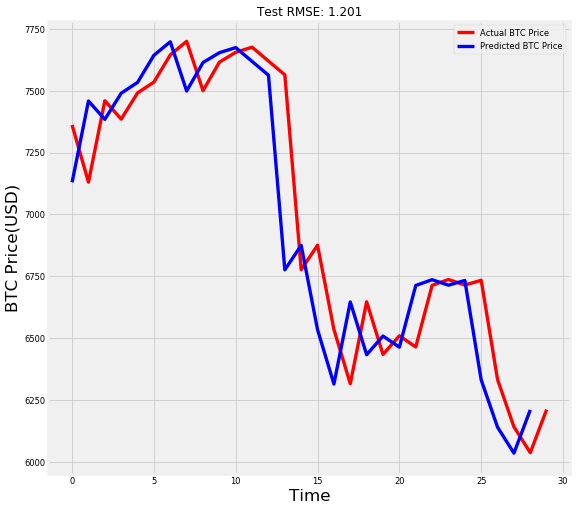

In [277]:
plt.figure(figsize=(10, 10), dpi=60, facecolor = 'w', edgecolor = 'k')

plt.plot(actual_price[:, 0], color='red', label='Actual BTC Price')
plt.plot(predicted_price_inv[1:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('BTC Price(USD)', fontsize = 20)
plt.legend(loc = 'best')
rmse = sqrt(mean_squared_error(actual_price, predicted_price_inv))
plt.title('Test RMSE: %.3f' % rmse)
plt.show()

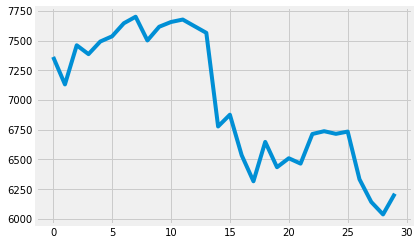

In [268]:
plt.plot(actual_price)

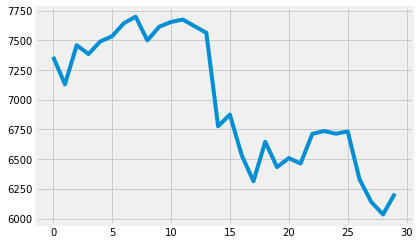

In [273]:
plt.plot(predicted_price_inv)